# MAGIC GAMMA TELESCOPE DATASET

**Importing Libraries**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Reading The Dataset MagicData
pd.read_csv("./magicData.data")

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

**Assigning Names of Attributes to the data according to the Data Label Provided with Dataset**
1. fLength: 
       continuous # major axis of ellipse [mm] 
       
2. fWidth: 
       continuous # minor axis of ellipse [mm] 
       
3. fSize: 
       continuous # 10-log of sum of content of all pixels [in #phot] 
       
4. fConc: 
       continuous # ratio of sum of two highest pixels over fSize [ratio] 
       
5. fConc1: 
       continuous # ratio of highest pixel over fSize [ratio] 
       
6. fAsym: 
       continuous # distance from highest pixel to center, projected onto major axis 
       
7. fM3Long: 
       continuous # 3rd root of third moment along major axis [mm] 
       
8. fM3Trans: 
       continuous # 3rd root of third moment along minor axis [mm] 
       
9. fAlpha: 
       continuous # angle of major axis with vector to origin [deg] 
       
10. fDist: 
       continuous # distance from origin to center of ellipse [mm]
       
11. Class: g,h # gamma (signal), hadron (background) 

In [4]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fm3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magicData.data",names=cols)

In [13]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fm3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [5]:
# Finding Number of unique values in the target output attribute ie. "class"
df["class"].unique()

array(['g', 'h'], dtype=object)

**Since Output class is string and have two classes at most so we typecast Class 'g' as 1 and Class 'h' as 0**

In [6]:
df["class"] = (df["class"]=="g").astype(int)

In [7]:
df["class"].unique()

array([1, 0])

### Visualizing Probability of output class dependency due to each attribute as Histogram

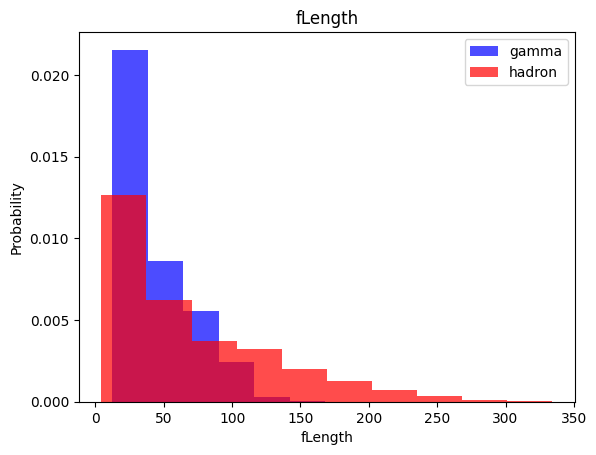

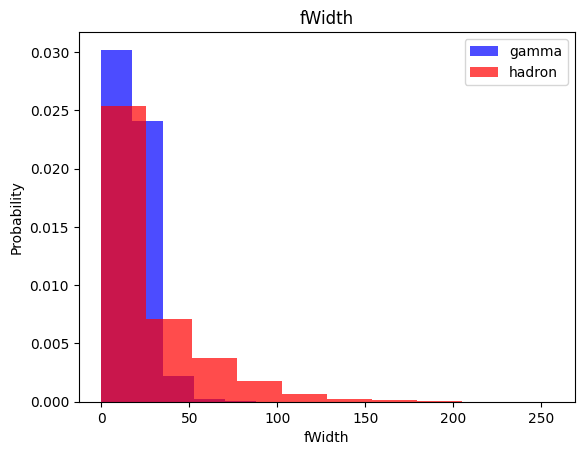

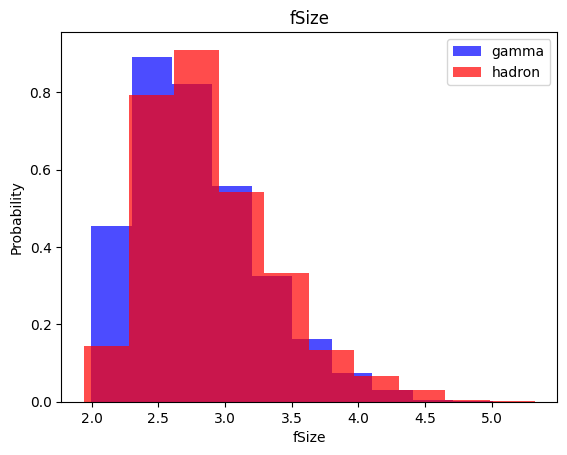

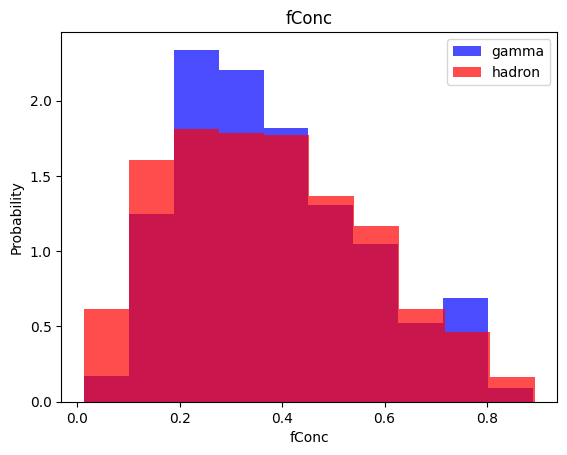

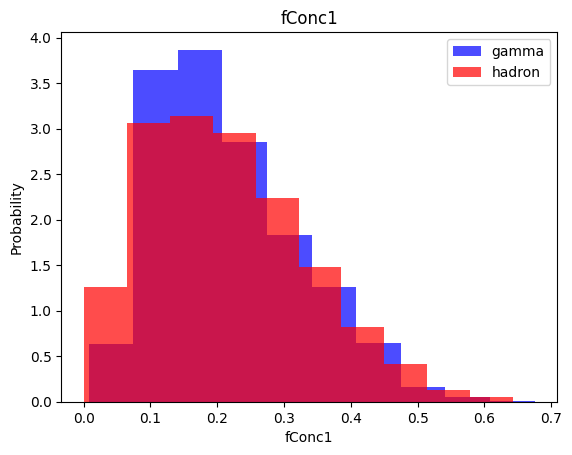

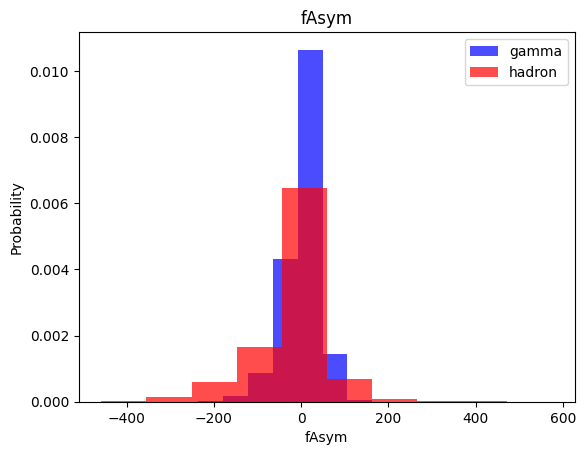

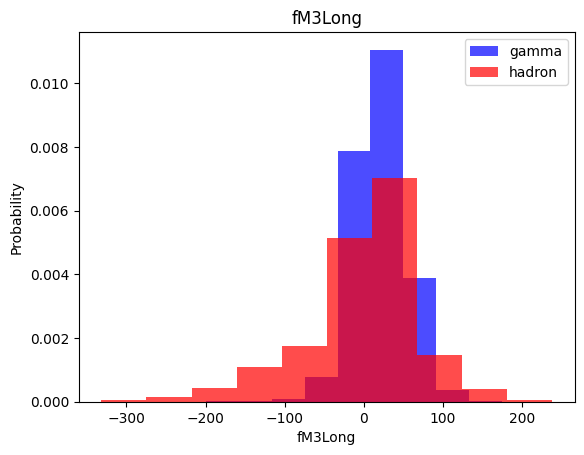

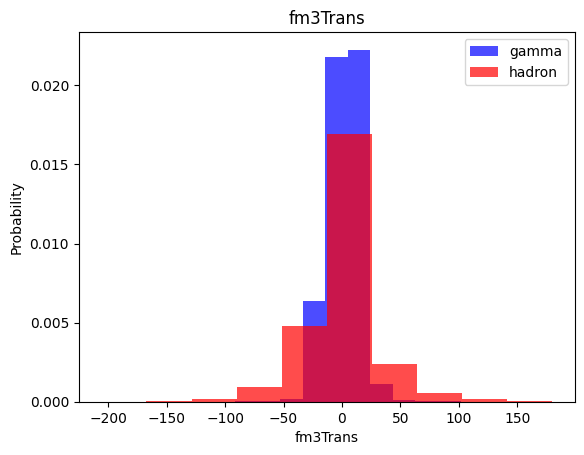

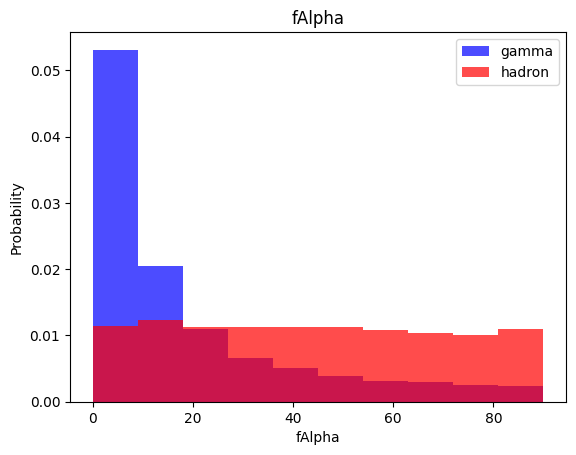

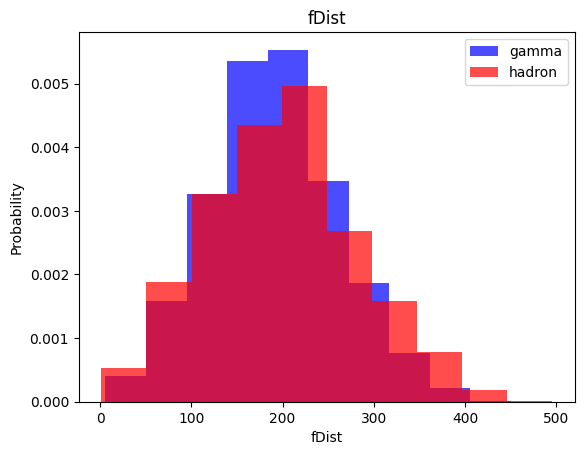

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#### Splitting Dataset into Training Set, Validation Set and Testing Set

In [9]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*(len(df))),int(0.8*len(df))])

In [10]:
train

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
13708   77.3327  18.1007  2.7020  0.3873  0.1936   71.9320   48.2209   
9628   146.6540  22.0517  3.0185  0.1687  0.0858  121.2400  134.7830   
2006    56.4198  16.7197  3.0660  0.2345  0.1302    9.1619   47.8684   
8220    28.5515  16.8605  2.5832  0.4021  0.2676   21.5225   19.4031   
4803    76.5716  33.5462  3.5914  0.2424  0.1326   25.3864   42.4458   
...         ...      ...     ...     ...     ...       ...       ...   
6485   100.6430  24.0109  3.4905  0.2095  0.1117   99.9048  100.5150   
6120    38.8690  16.4441  2.5231  0.2669  0.1364   60.1956  -14.2822   
17304   46.6248  24.5550  3.0206  0.2766  0.1435   16.6413   35.8694   
6516    26.5857  12.6161  2.4669  0.4300  0.2167  -30.1642  -19.9839   
2117    45.5945  21.2593  3.0538  0.2102  0.1144  -19.4628  -32.9385   

       fm3Trans   fAlpha    fDist  class  
13708  -14.4452  30.5580  147.225      0  
9628   -15.8498   8.2010  259.954      1  
2006    11.5413   3.0930  205.266      1  
8220    -8.3458  17.6520  208.254      1  
4803   -15.9110   4.4055  352.472      1  
...         ...      ...      ...    ...  
6485    17.9704   4.0150  248.433      1  
6120    12.1884   3.0080  120.348      1  
17304  -12.4600  39.6853  125.349      0  
6516    -6.3431  13.8730  209.990      1  
2117     6.9607   9.0222  216.746      1  

[11412 rows x 11 columns]

In [11]:
valid

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fm3Trans  \
13127  27.3811   8.3378  2.5849  0.5956  0.3368   7.2203  15.3393    3.3975   
16386  26.9760  14.0429  2.4969  0.4682  0.2436  19.0082  12.9016    3.6409   
329    54.2845  17.4844  2.6217  0.4683  0.2927 -14.1093 -62.4836  -16.2378   
9470   33.4462  20.6240  2.7555  0.2581  0.1308  11.7123 -19.2229    4.5362   
14316  49.0438  24.5865  2.5998  0.5980  0.4118 -38.8131 -28.4104  -20.4156   
...        ...      ...     ...     ...     ...      ...      ...       ...   
9591   12.6594  11.7580  2.0512  0.7111  0.3689  15.4943  -7.2481   11.1789   
802    16.3607  11.5709  2.3522  0.5956  0.3089  -2.3935   6.7419   -4.0054   
11851  21.7992  12.2946  2.4510  0.5416  0.2956   1.5458  -9.7833   -8.2258   
17842  34.9667   9.0557  2.8065  0.4778  0.2428  44.6591  20.6854   -7.1810   
3401   18.1602  10.3203  2.2553  0.6278  0.3417  -2.3181   8.3368   -6.6033   

        fAlpha     fDist  class  
13127   1.3890  115.1220      0  
16386   0.6298  139.0150      0  
329     1.7076  211.6990      1  
9470    8.6140  255.4880      1  
14316   6.2538  317.3148      0  
...        ...       ...    ...  
9591   73.2030  191.6700      1  
802    35.4270  155.9500      1  
11851  17.1558  188.1340      1  
17842  53.6670  206.2310      0  
3401   79.6970  154.5350      1  

[3804 rows x 11 columns]

In [12]:
test

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fm3Trans  \
16073  46.4080  12.6657  2.6435  0.3477  0.2148  -7.1063  29.8569    7.4715   
7217   41.9841  20.3999  2.6289  0.3220  0.1939  32.2729  36.4194  -15.5429   
9101   12.9176  11.1995  2.2240  0.7343  0.4388  14.5232  -7.7005   -8.4019   
4308   35.0354  16.1398  2.7101  0.3041  0.1569  14.4875  21.6115   12.6842   
7704   27.4069  22.8564  3.0336  0.3498  0.2291  -5.1180 -14.9290   17.3300   
...        ...      ...     ...     ...     ...      ...      ...       ...   
12849  53.5860   3.1711  2.6269  0.3927  0.1933  -3.6971   4.6324  -20.6368   
15685  60.6589  24.0070  3.1673  0.2442  0.1316 -48.0334 -56.8415   19.9380   
1354   59.4407  26.0793  2.9734  0.3424  0.1994  56.1404  52.1499  -12.1136   
11888  25.4704  16.0388  2.5126  0.4547  0.2565 -20.0240  16.0959   -9.4221   
9552   18.0866  10.0200  2.3365  0.6682  0.3940  19.6741  12.8968   -5.6857   

        fAlpha     fDist  class  
16073  67.3650  205.3120      0  
7217    5.7830  161.8030      1  
9101   17.4554   73.1766      1  
4308   55.3614   45.2255      1  
7704   76.0500  102.3300      1  
...        ...       ...    ...  
12849  15.9907  201.0377      0  
15685  68.5470   74.1597      0  
1354    5.8360  252.4900      1  
11888   9.7610  116.6680      1  
9552   82.8204  120.2320      1  

[3804 rows x 11 columns]

In [13]:
Total = 11412+3804+3804
print("Total = ",Total)

Total =  19020


In [14]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fm3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [17]:
# Checking Train Data of each class
print(f"Train Data of Class 1 = {len(train[train['class']==1])}")
print(f"Train Data of CLass 0 = {len(train[train['class']==0])}")

Train Data of Class 1 = 7339
Train Data of CLass 0 = 4073


### Train data is imbalance ,Therefore we have to use RandomOverSampler to over-sample the data
### Then We scaled the data using StandardScalar

In [18]:
def scale_dataset(dataframe,oversampler=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversampler:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y

In [19]:
# Checking Train Data of each class
print(f"Train Data of Class 1 = {len(train[train['class']==1])}")
print(f"Train Data of CLass 0 = {len(train[train['class']==0])}")

Train Data of Class 1 = 7339
Train Data of CLass 0 = 4073


In [20]:
# Getting Oversampled Data
train, X_train,y_train = scale_dataset(train,oversampler=True)

In [21]:
# Getting count of Oversampled Data of Class 0 and Class 1
print(f"Training Data belonging to Class 1 = {sum(y_train==1)}")
print(f"Training Data belonging to Class 0 = {sum(y_train==0)}")

Training Data belonging to Class 1 = 7339
Training Data belonging to Class 0 = 7339


### Scaling Validation Datasets and Testing Datasets

In [27]:
valid, X_valid,y_valid = scale_dataset(valid,oversampler=False)
test, X_test,y_test = scale_dataset(test,oversampler=False)

In [28]:
train

array([[ 0.56201728, -0.22899689, -0.26310104, ...,  0.09953375,
        -0.60935703,  0.        ],
       [ 2.18463193, -0.01744778,  0.40294767, ..., -0.75319829,
         0.89112434,  1.        ],
       [ 0.07250571, -0.30294002,  0.50290759, ..., -0.94802565,
         0.16319874,  1.        ],
       ...,
       [ 2.03419413,  2.798538  ,  1.8343737 , ..., -0.67668622,
         1.84731202,  0.        ],
       [ 0.29589193,  0.54213199,  1.55048753, ...,  0.42549197,
         1.19475057,  0.        ],
       [ 1.63263028,  3.00358696,  2.03261   , ...,  2.3593137 ,
         1.8087794 ,  0.        ]])

In [29]:
test

array([[-0.15638951, -0.50294621, -0.37316992, ...,  1.53657411,
         0.13260197,  0.        ],
       [-0.26256422, -0.06834886, -0.4043131 , ..., -0.83322759,
        -0.45496922,  1.        ],
       [-0.96016748, -0.58533439, -1.26800321, ..., -0.38404969,
        -1.65183236,  1.        ],
       ...,
       [ 0.15639854,  0.25078592,  0.33053808, ..., -0.83118804,
         0.76972149,  1.        ],
       [-0.65889714, -0.3134062 , -0.65239204, ..., -0.68014599,
        -1.06449886,  1.        ],
       [-0.83611019, -0.65161242, -1.02803004, ...,  2.1313296 ,
        -1.0163685 ,  1.        ]])

In [30]:
valid

array([[-0.61894409, -0.77339517, -0.51377048, ..., -0.98848504,
        -1.07131711,  0.        ],
       [-0.62859556, -0.45408202, -0.70162658, ..., -1.01784692,
        -0.74917971,  0.        ],
       [ 0.02202687, -0.26146205, -0.43521248, ..., -0.97616326,
         0.23078241,  1.        ],
       ...,
       [-0.75193234, -0.55193398, -0.79961061, ..., -0.37870779,
        -0.08693273,  1.        ],
       [-0.43821789, -0.73321447, -0.04071467, ...,  1.03335422,
         0.15706009,  0.        ],
       [-0.83863117, -0.6624351 , -1.21737696, ...,  2.04005831,
        -0.53993129,  1.        ]])

## Applying Basic Machine Learning Algorithms

In [44]:
accuracy_dic = {}
def add_accuracy(Atrain,Atest,algo):
    accuracy_dic[algo] = {"Train":Atrain,"Test":Atest}
    print("Successfully added Accuracy of {} in the Accuracy Dictionary".format(algo))

## 1. K-Nearnest Neighbour

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [111]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [112]:
# Making Predictions on Training and Testing Dataset
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [113]:
#Calculating Training and Testing Accuracy
knn_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {knn_train_accuracy}")
print(f"Testing Accuracy: {knn_test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.8180862250262881


In [114]:
#Storing Calculated Training and Testing Accuracy in a Dictionary
add_accuracy(knn_train_accuracy,knn_test_accuracy,"knn")

Successfully added Accuracy of knn in the Accuracy Dictionary


In [115]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1330
           1       0.84      0.90      0.86      2474

    accuracy                           0.82      3804
   macro avg       0.81      0.78      0.79      3804
weighted avg       0.82      0.82      0.81      3804



Confusion Matrix:
[[ 897  433]
 [ 259 2215]]


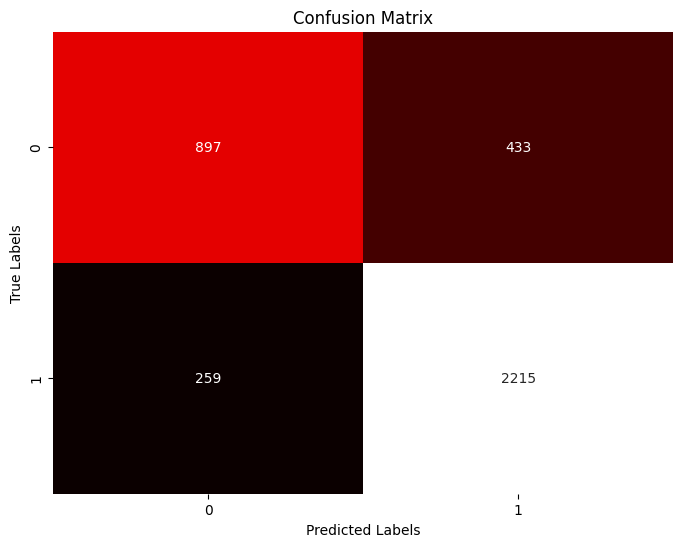

In [116]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 2. Naive Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB

In [118]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [119]:
# Making Predictions on Training and Testing Dataset
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

In [120]:
#Calculating Training and Testing Accuracy
nb_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
nb_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {nb_train_accuracy}")
print(f"Testing Accuracy: {nb_test_accuracy}")

Training Accuracy: 0.6491347595040197
Testing Accuracy: 0.7087276550998949


In [121]:
#Storing Calculated Training and Testing Accuracy in a Dictionary
add_accuracy(nb_train_accuracy,nb_test_accuracy,"NaiveBayes")

Successfully added Accuracy of NaiveBayes in the Accuracy Dictionary


In [122]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49      1330
           1       0.73      0.88      0.80      2474

    accuracy                           0.71      3804
   macro avg       0.68      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



Confusion Matrix:
[[ 526  804]
 [ 304 2170]]


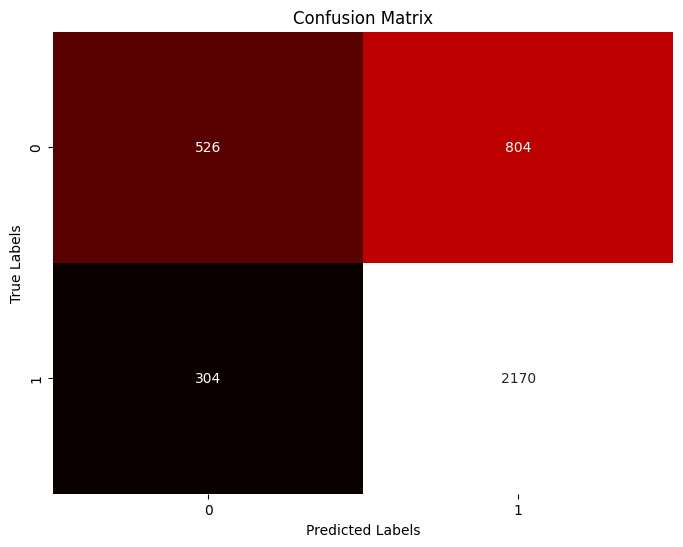

In [123]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 3. Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [126]:
# Making Predictions on Training and Testing Dataset
y_train_pred = lg_model.predict(X_train)
y_test_pred = lg_model.predict(X_test)

In [127]:
#Calculating Training and Testing Accuracy
lg_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
lg_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {lg_train_accuracy}")
print(f"Testing Accuracy: {lg_test_accuracy}")

Training Accuracy: 0.7697915247308897
Testing Accuracy: 0.7899579390115667


In [128]:
#Storing Calculated Training and Testing Accuracy in a Dictionary
add_accuracy(lg_train_accuracy,lg_test_accuracy,"LogisticRegression")

Successfully added Accuracy of LogisticRegression in the Accuracy Dictionary


In [129]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1330
           1       0.85      0.83      0.84      2474

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Confusion Matrix:
[[ 959  371]
 [ 428 2046]]


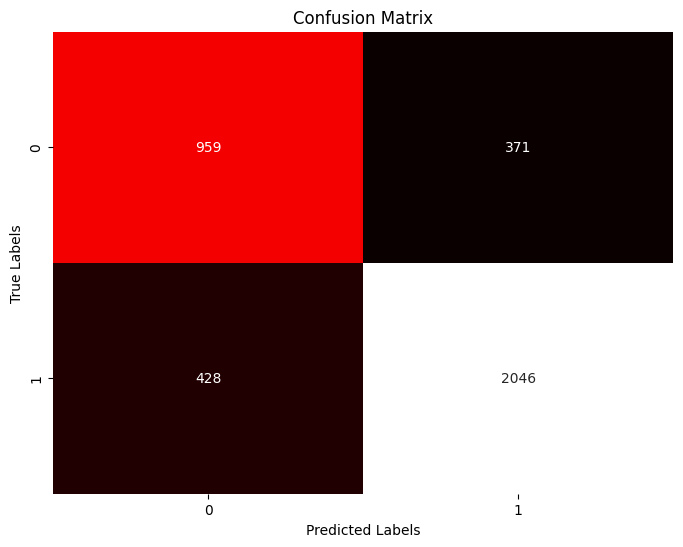

In [130]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 4. Support Vector Machine

In [131]:
from sklearn.svm import SVC

In [132]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [133]:
# Making Predictions on Training and Testing Dataset
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

In [134]:
#Calculating Training and Testing Accuracy
svm_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
svm_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {svm_train_accuracy}")
print(f"Testing Accuracy: {svm_test_accuracy}")

Training Accuracy: 0.8511377571876277
Testing Accuracy: 0.870925341745531


In [135]:
#Storing Calculated Training and Testing Accuracy in a Dictionary
add_accuracy(svm_train_accuracy,svm_test_accuracy,"SVM")

Successfully added Accuracy of SVM in the Accuracy Dictionary


In [136]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1330
           1       0.89      0.92      0.90      2474

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



Confusion Matrix:
[[1049  281]
 [ 210 2264]]


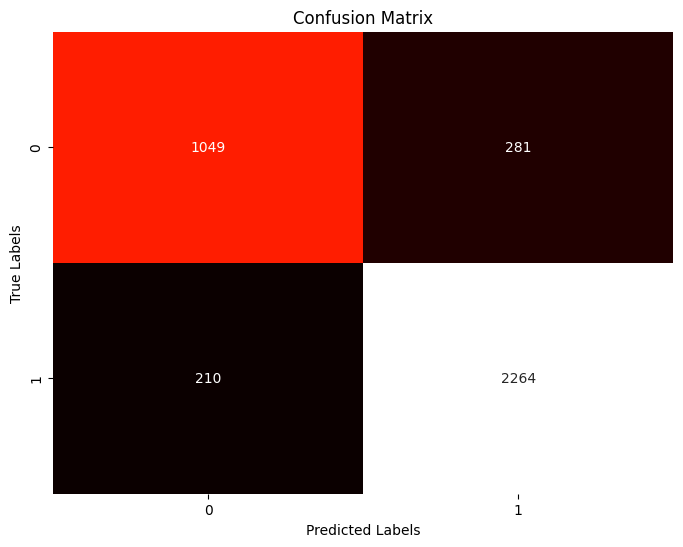

In [137]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 5. Decision Tree Classifier

In [138]:
accuracy_dic

{'knn': {'Train': 1.0, 'Test': 0.8180862250262881},
 'NaiveBayes': {'Train': 0.6491347595040197, 'Test': 0.7087276550998949},
 'LogisticRegression': {'Train': 0.7697915247308897,
  'Test': 0.7899579390115667},
 'SVM': {'Train': 0.8511377571876277, 'Test': 0.870925341745531},
 'DecisionTree': {'Train': 0.6491347595040197, 'Test': 0.7087276550998949}}

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = dt_classifier.fit(X_train, y_train)

In [141]:
# Making Predictions on Training and Testing Dataset
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

In [142]:
#Calculating Training and Testing Accuracy
dt_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
dt_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {dt_train_accuracy}")
print(f"Testing Accuracy: {dt_test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.8015247108307045


In [143]:
#Storing Calculated Training and Testing Accuracy in a Dictionary
add_accuracy(dt_train_accuracy,dt_test_accuracy,"DecisionTree")

Successfully added Accuracy of DecisionTree in the Accuracy Dictionary


In [144]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1330
           1       0.86      0.83      0.84      2474

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.78      3804
weighted avg       0.80      0.80      0.80      3804



Confusion Matrix:
[[ 994  336]
 [ 419 2055]]


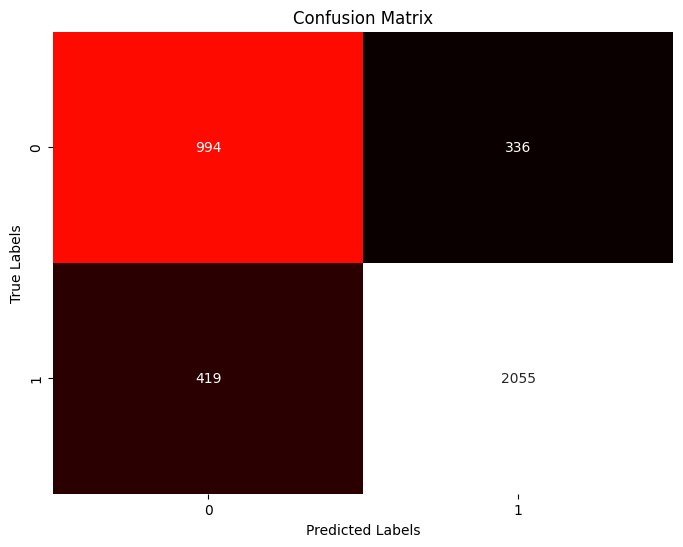

In [145]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 6. Random Forest Classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier = rf_classifier.fit(X_train, y_train)

In [148]:
# Making Predictions on Training and Testing Dataset
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

In [149]:
#Calculating Training and Testing Accuracy
rf_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
rf_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {rf_train_accuracy}")
print(f"Testing Accuracy: {rf_test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.8767087276550999


In [150]:
#Storing Calculated Training and Testing Accuracy in a Dictionary
add_accuracy(rf_train_accuracy,rf_test_accuracy,"RandomForest")

Successfully added Accuracy of RandomForest in the Accuracy Dictionary


In [151]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1330
           1       0.89      0.92      0.91      2474

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.86      3804
weighted avg       0.88      0.88      0.88      3804



Confusion Matrix:
[[1053  277]
 [ 192 2282]]


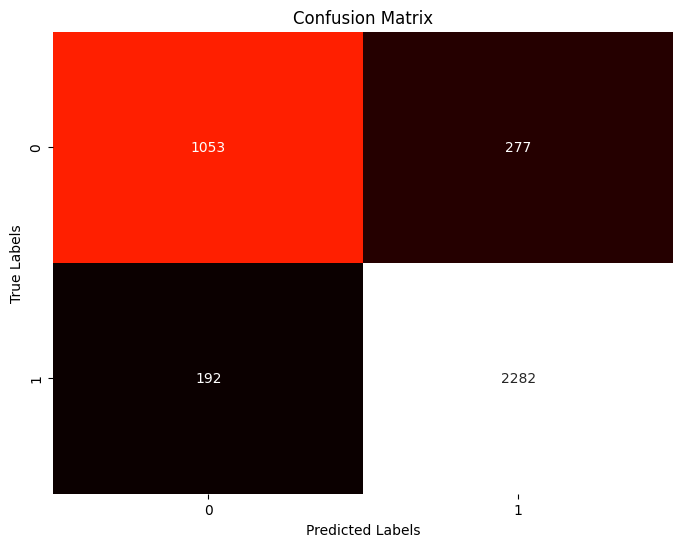

In [152]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [153]:
accuracy_dic

{'knn': {'Train': 1.0, 'Test': 0.8180862250262881},
 'NaiveBayes': {'Train': 0.6491347595040197, 'Test': 0.7087276550998949},
 'LogisticRegression': {'Train': 0.7697915247308897,
  'Test': 0.7899579390115667},
 'SVM': {'Train': 0.8511377571876277, 'Test': 0.870925341745531},
 'DecisionTree': {'Train': 1.0, 'Test': 0.8015247108307045},
 'RandomForest': {'Train': 1.0, 'Test': 0.8767087276550999}}

#### Plotting The Training and Testing Accuracy to make a contrast and find the best among all six models

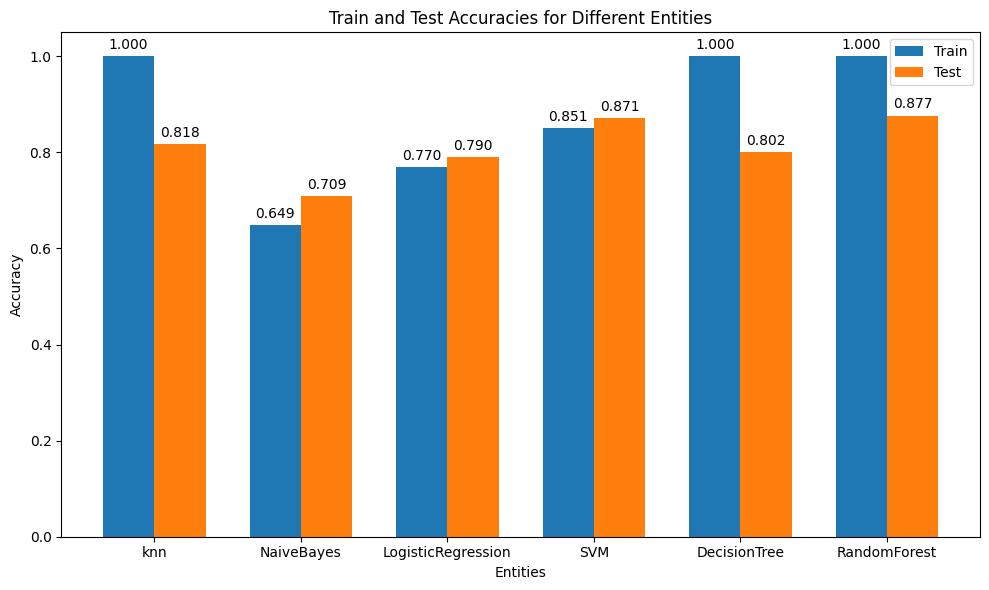

In [154]:
# Extract entities, training, and testing values
entities = list(accuracy_dic.keys())
train_values = [value['Train'] for value in accuracy_dic.values()]
test_values = [value['Test'] for value in accuracy_dic.values()]

# Set up positions for the bar groups
bar_width = 0.35
index = np.arange(len(entities))

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, train_values, bar_width, label='Train')
bar2 = ax.bar(index + bar_width, test_values, bar_width, label='Test')

# Customize the plot
ax.set_xlabel('Entities')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracies for Different Entities')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(entities)
ax.legend()

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.3f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

# Show the plot
plt.tight_layout()
plt.show()

#### From the Above Bar Graph We Conclude that Random Forest is the Most Ideal model for making Predictions on this 
#### MAGIC GAMMA TELESCOPE DATASET 

In [155]:
# Saving The Random Forest Classifier Model 
import joblib
joblib.dump(rf_classifier, 'randomForest.joblib')

['randomForest.joblib']

# IMPROVING ACCURACY USING ADVANCED DEEP LEARNING MODELS

In [156]:
# Function To plot Subplots of accuracy and binary cross entropy loss
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2)
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary CrossEntropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

### FEEDFORWARD NEURAL NETWORK MODEL (FNN)

**Importing Tensorflow library**

In [157]:
import tensorflow as tf

**Checking the type of dataset to using scatter graph to get best**                                                                                         
**1. Learning Rate**                                                                                                                                        
**2. Dropout Probability**                                                                                                                                  
**3. Suitable Activation Function**                                                                                                                         
**4. Batch Size**                                                                                                                                           
**--> Making all Combination of Column to learn about Dataset**                                                                               

In [183]:
# Function to Plot a Scatter Graph
def scatterPlot(feature1,feature2,df):
    # Plot the scatter graph
    plt.scatter(df[feature1][df['class'] == 1], df[feature2][df['class'] == 1], label='Gamma', alpha=0.5, marker='o')
    plt.scatter(df[feature1][df['class'] == 0], df[feature2][df['class'] == 0], label='Hadron', alpha=0.5, marker='s')

    # Add labels and title
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Scatter Plot of Magic Gamma Telescope Dataset')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

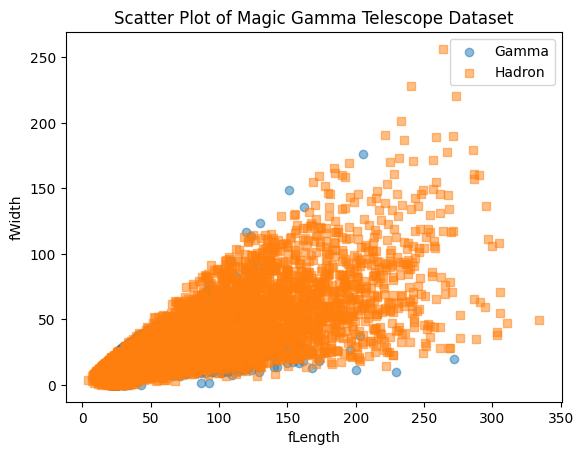

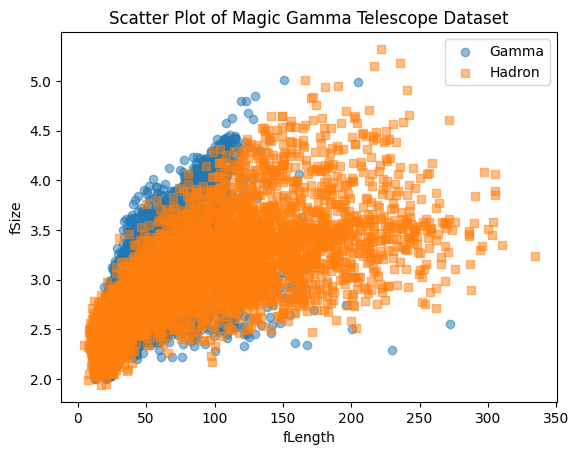

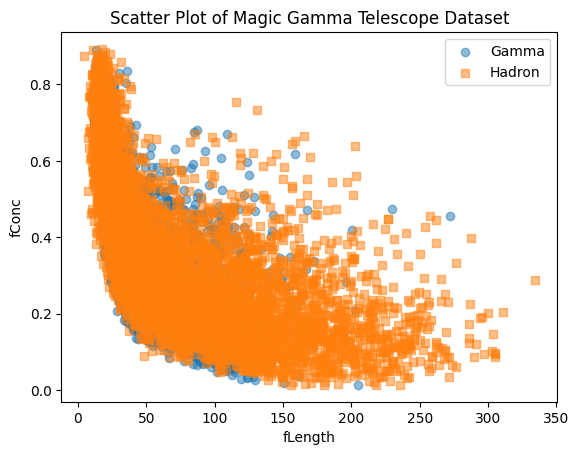

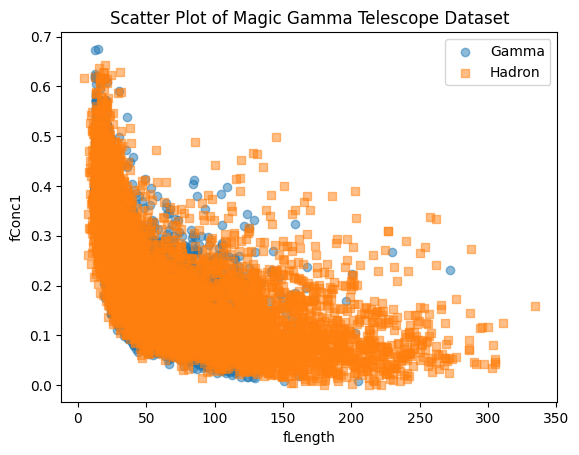

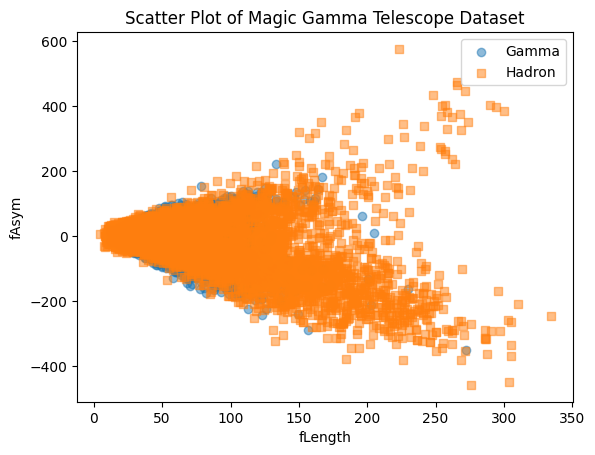

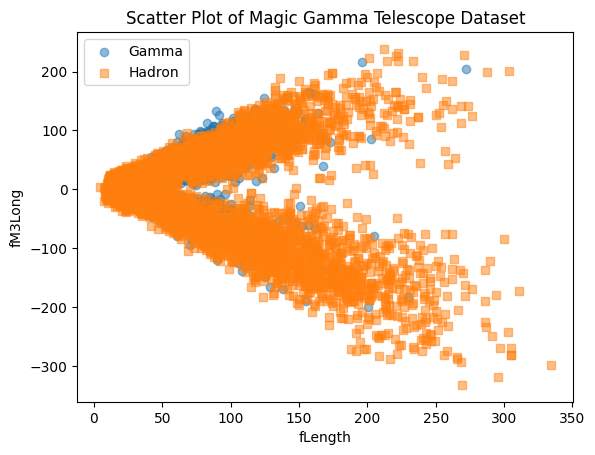

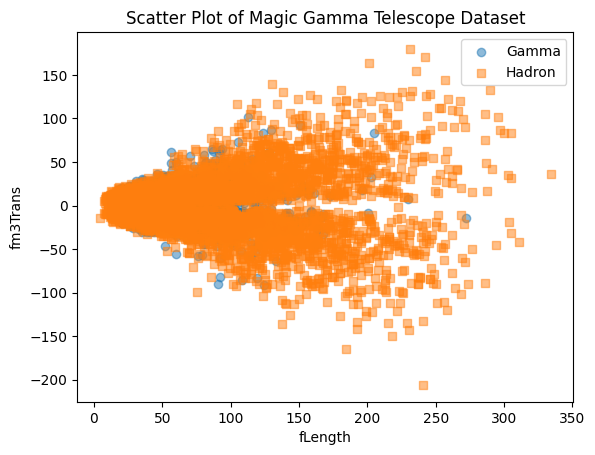

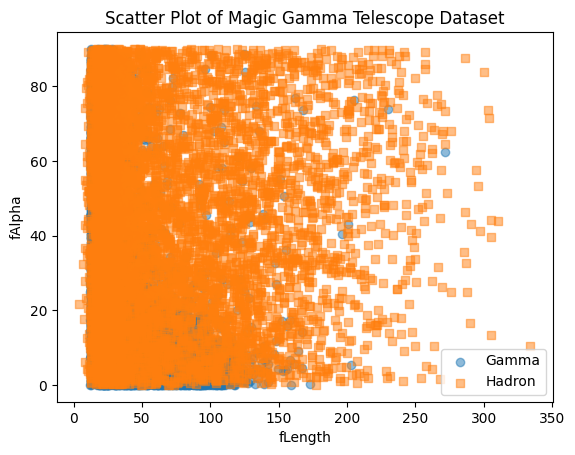

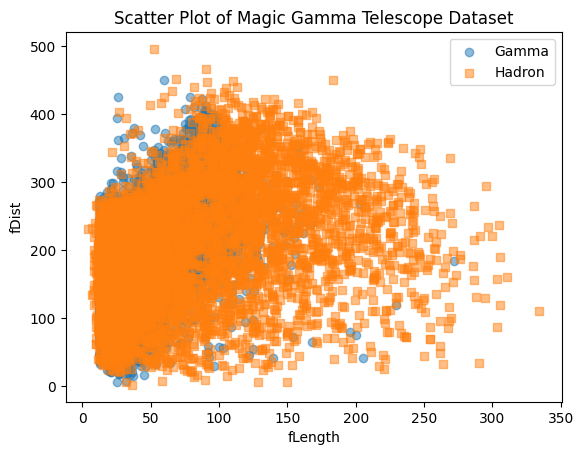

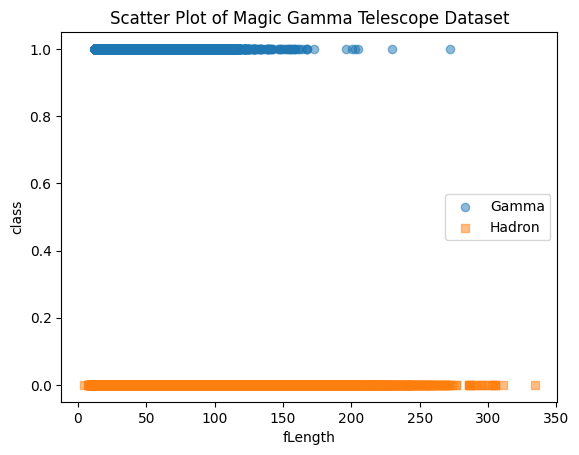

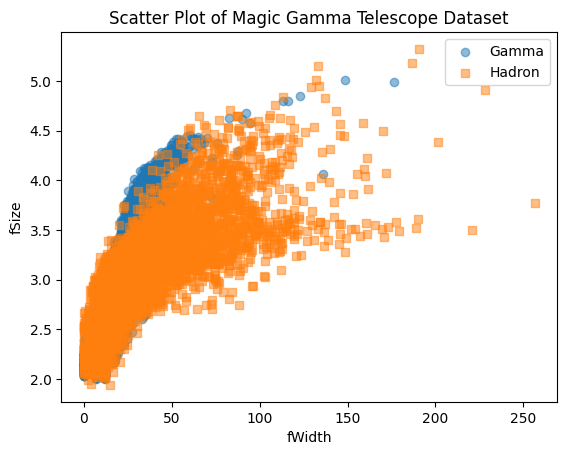

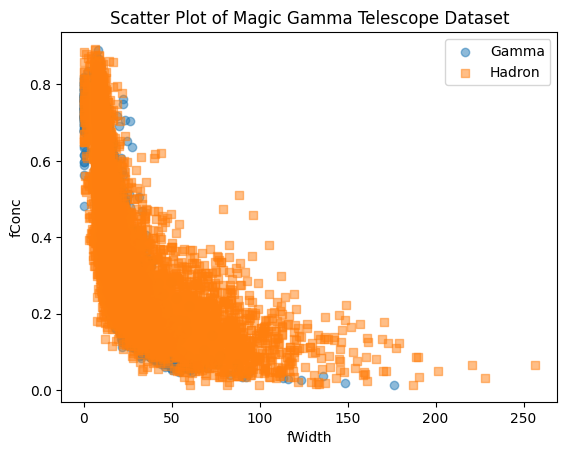

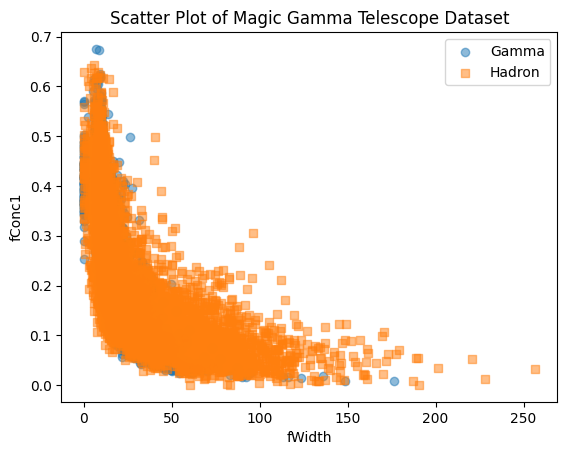

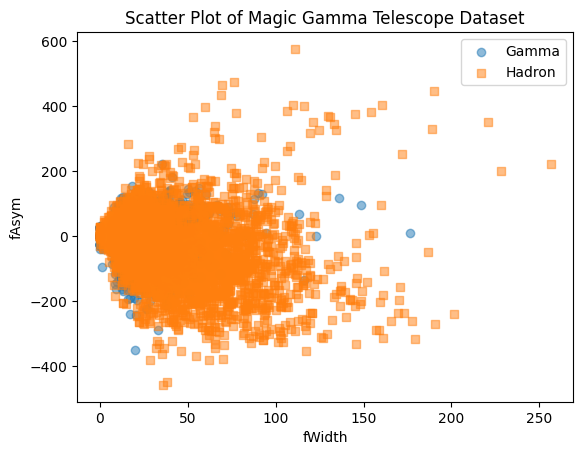

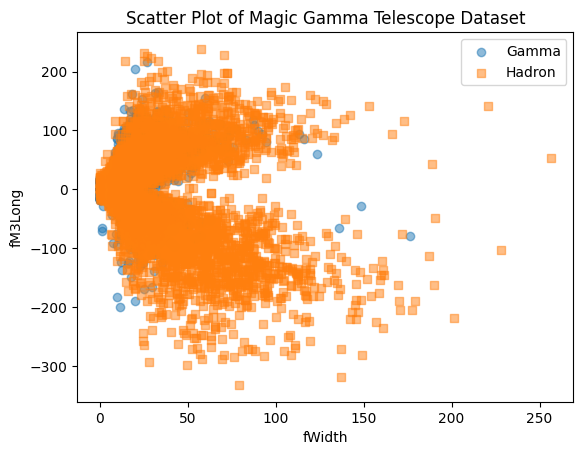

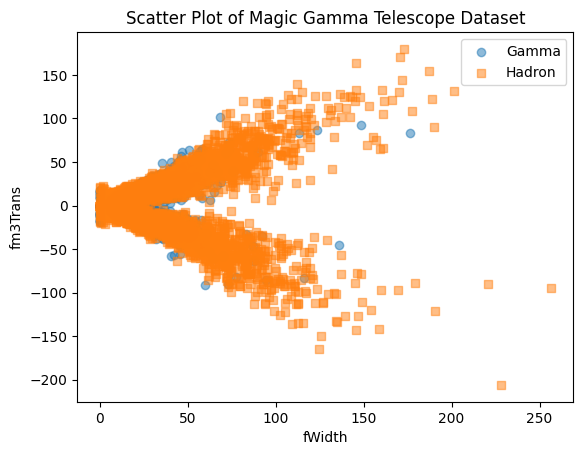

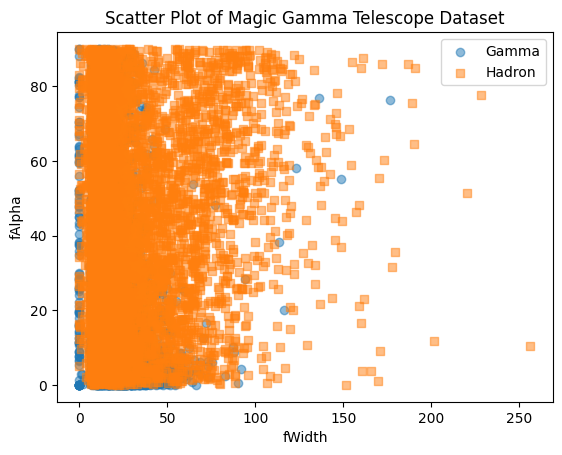

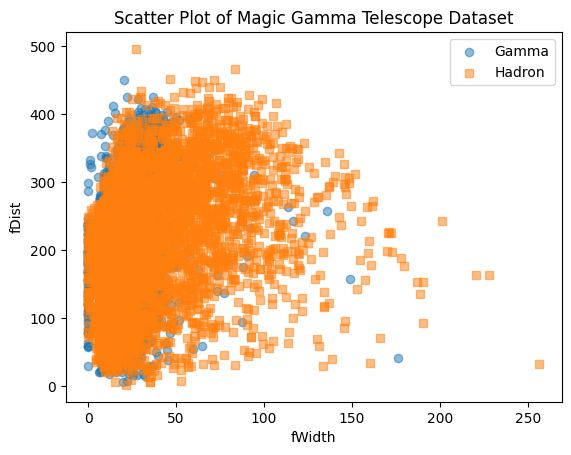

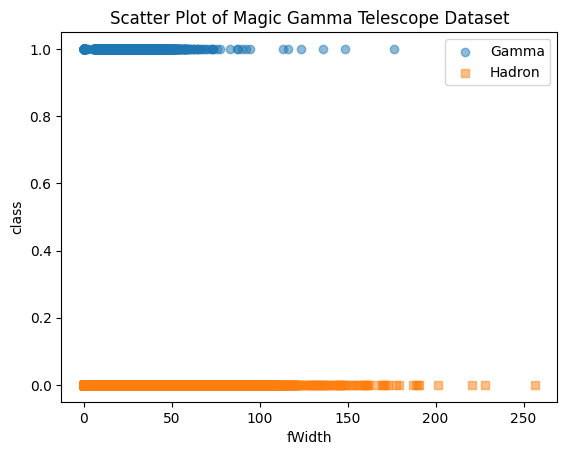

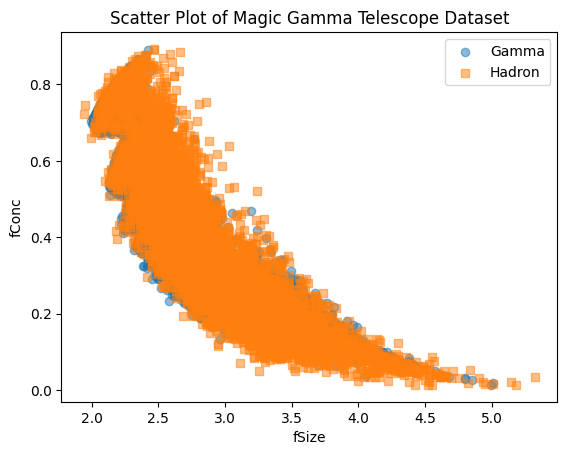

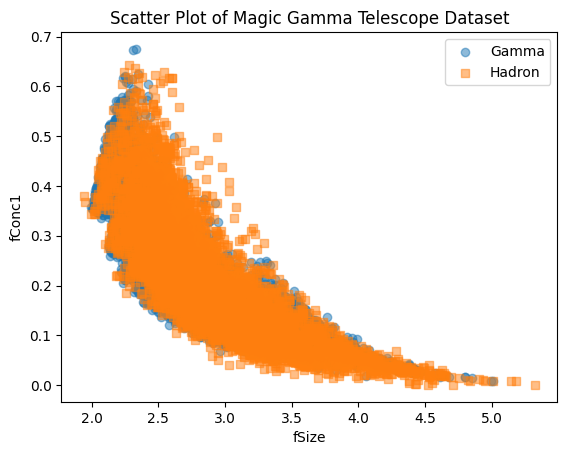

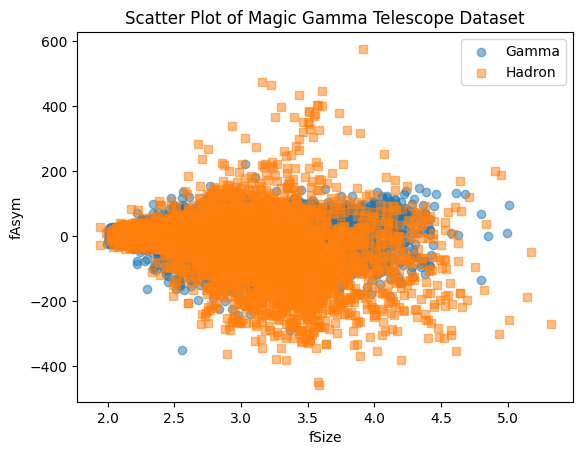

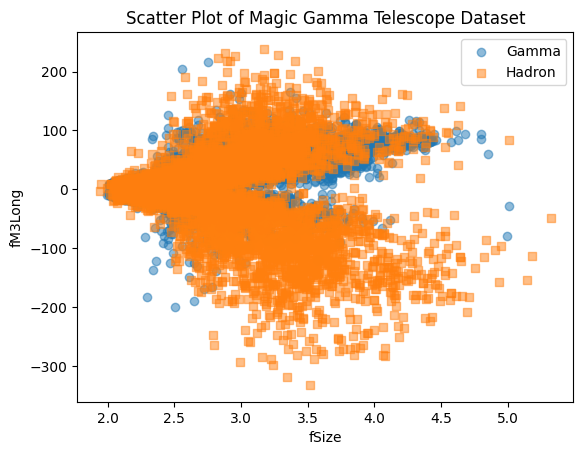

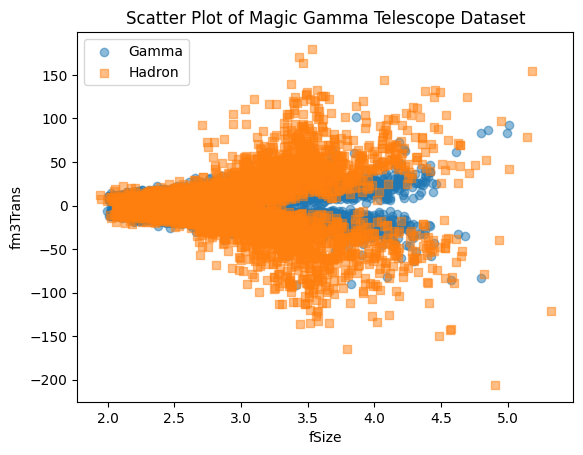

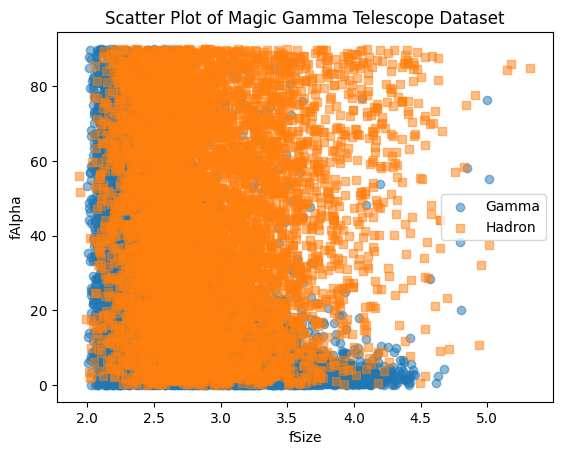

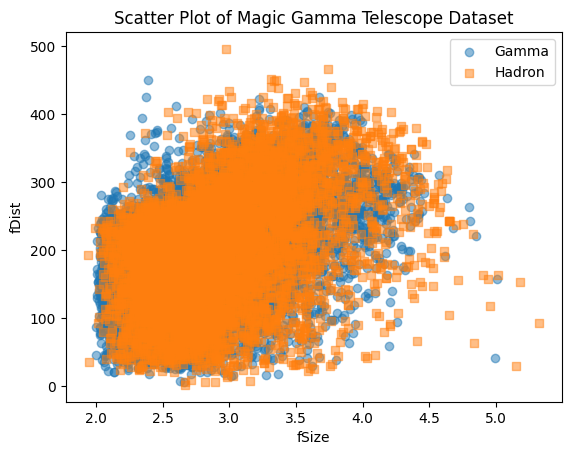

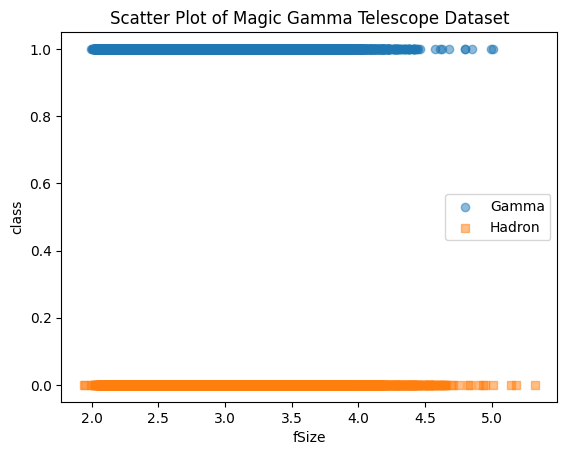

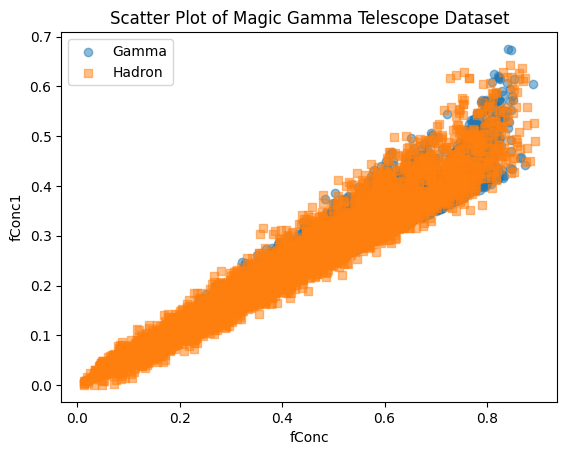

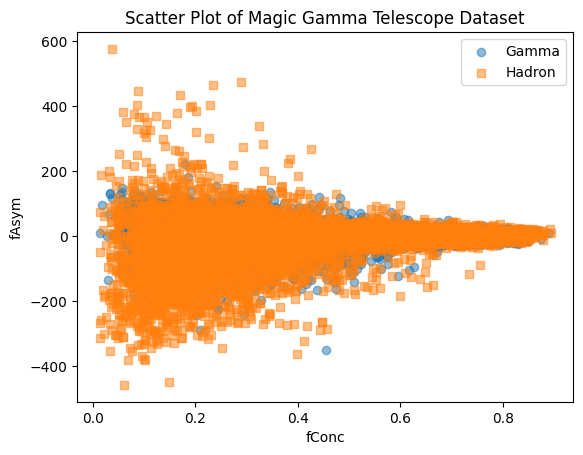

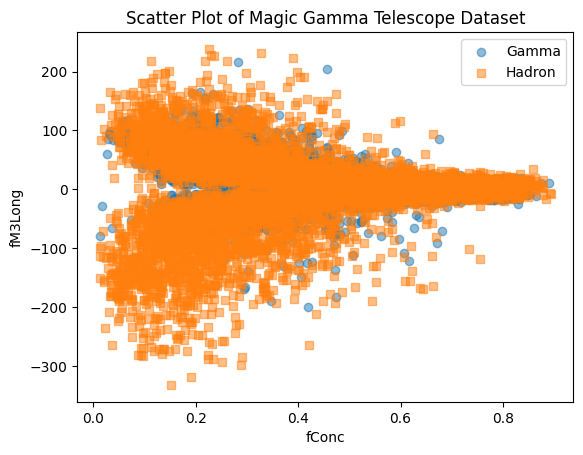

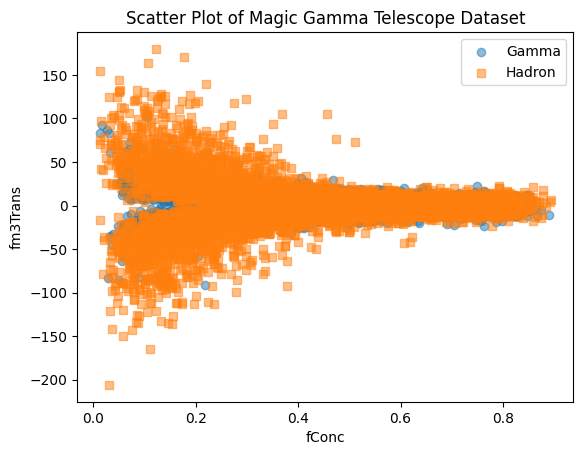

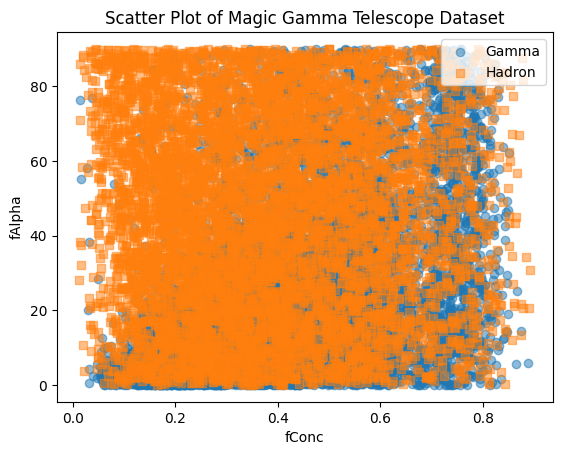

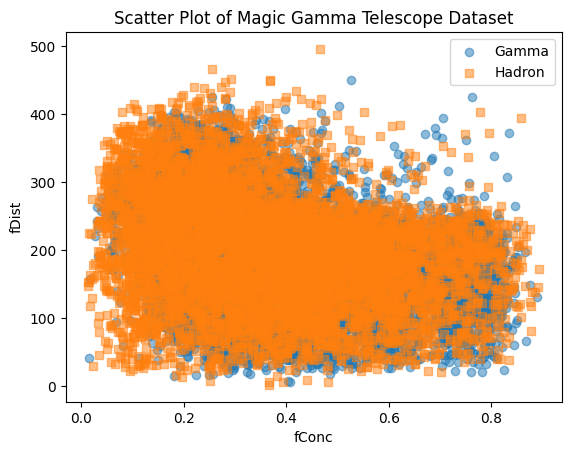

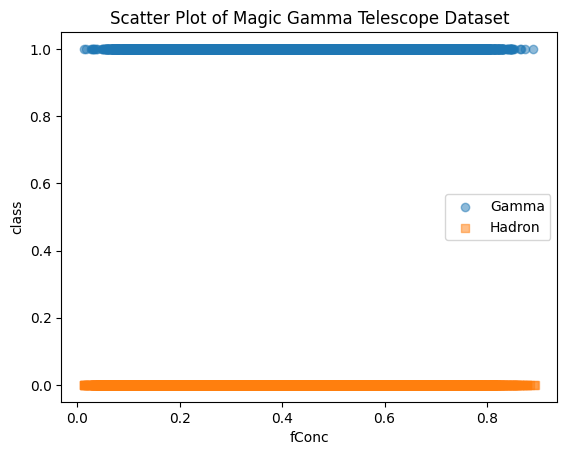

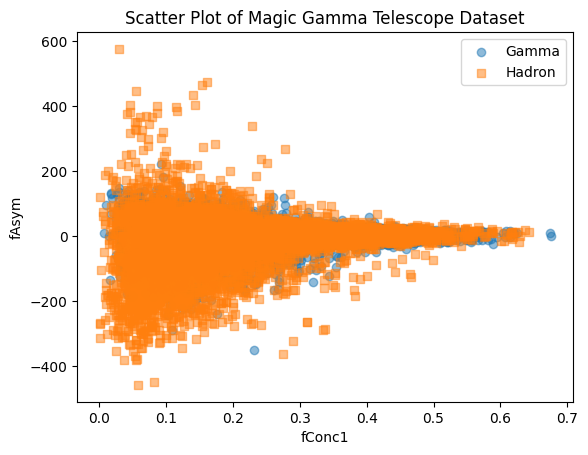

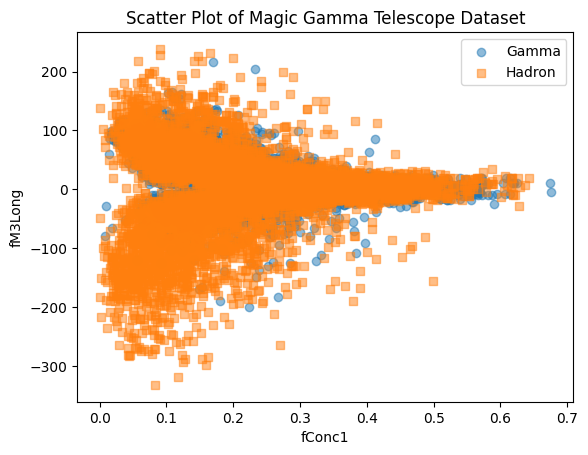

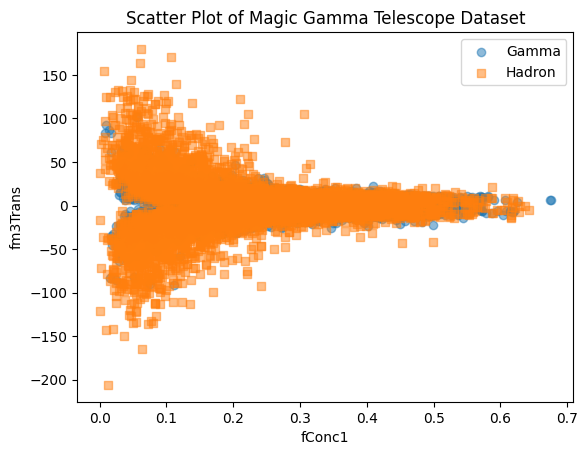

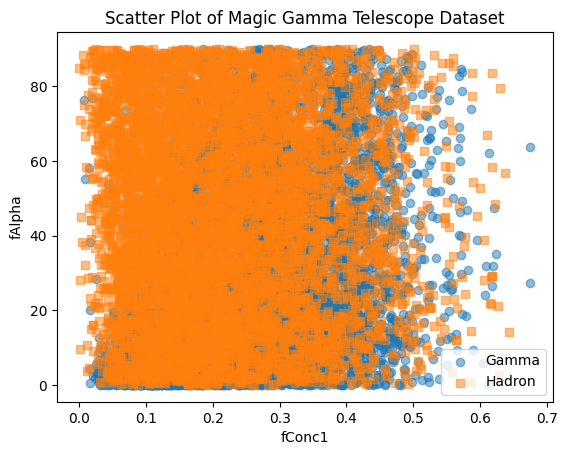

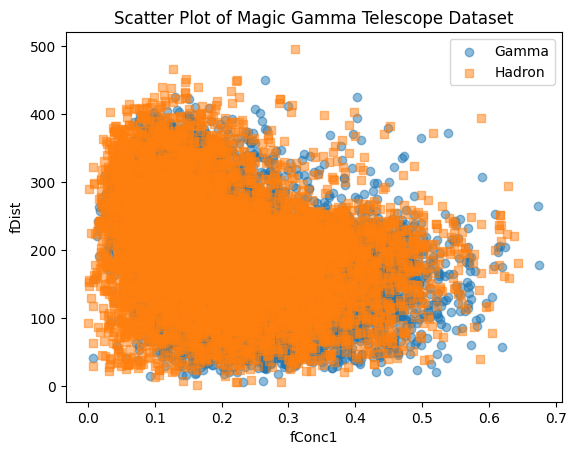

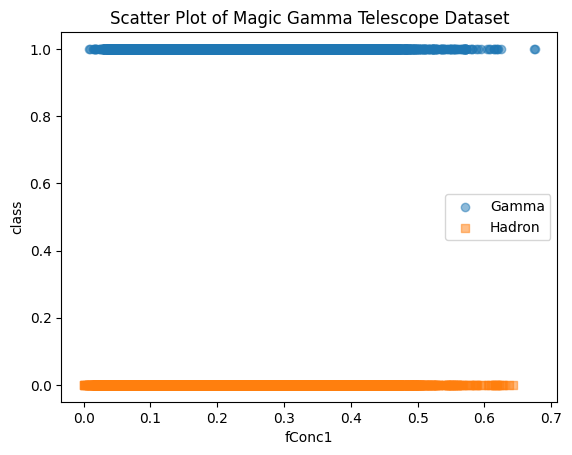

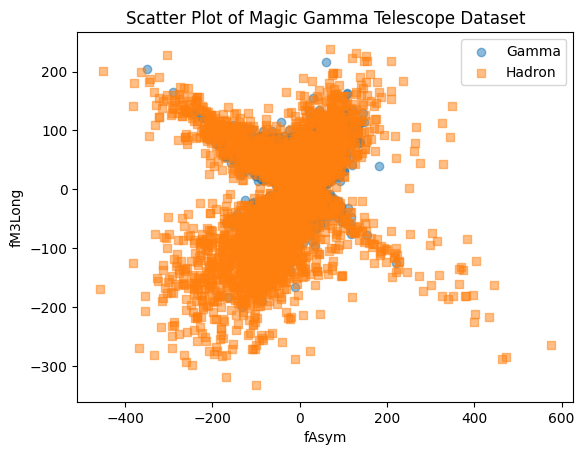

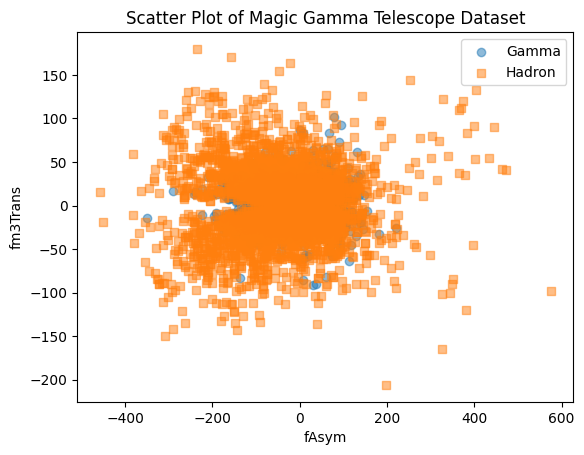

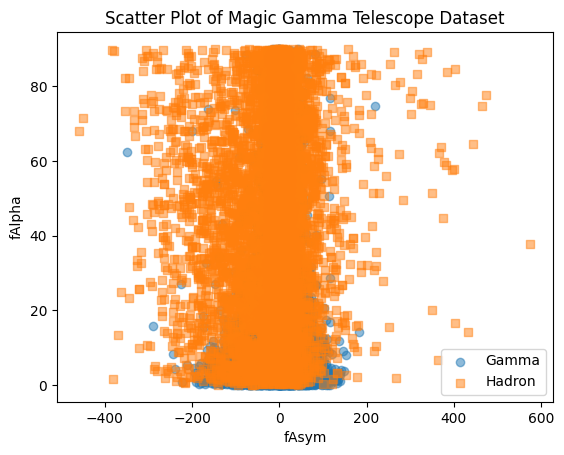

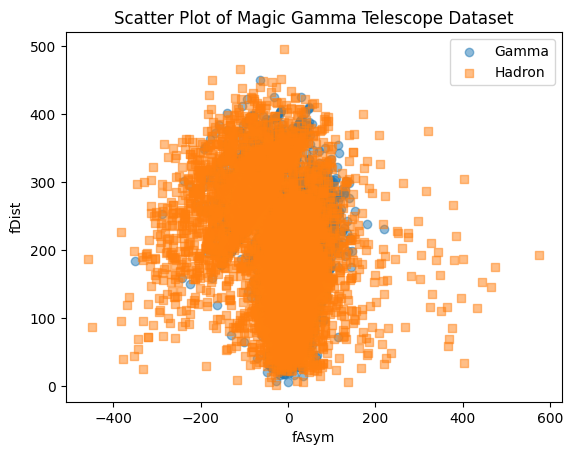

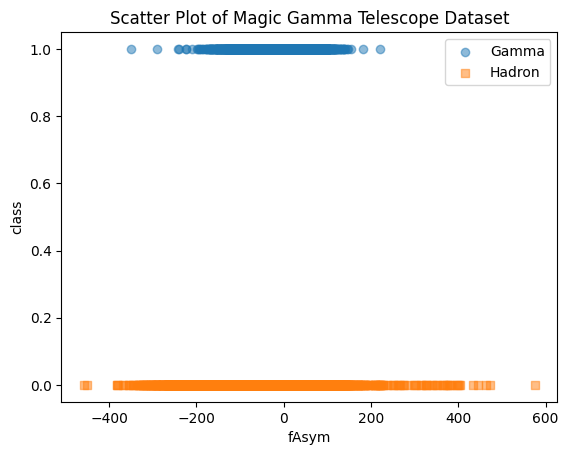

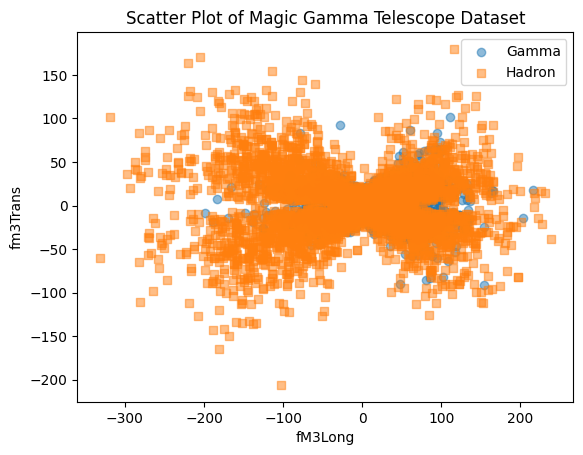

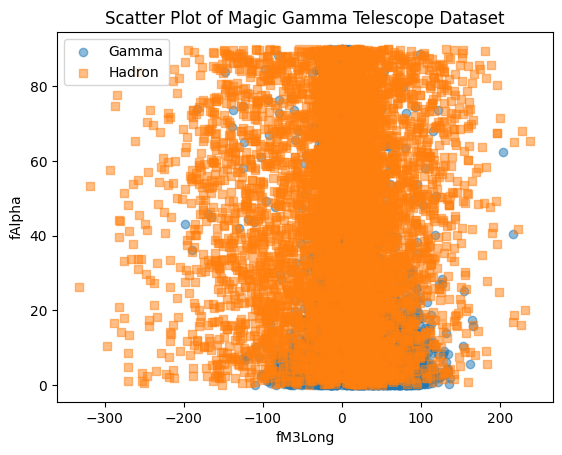

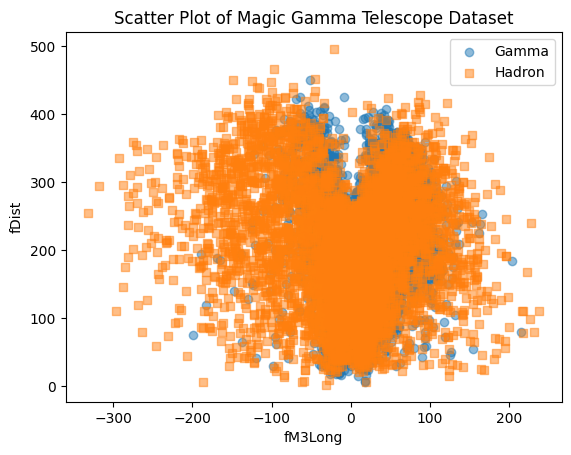

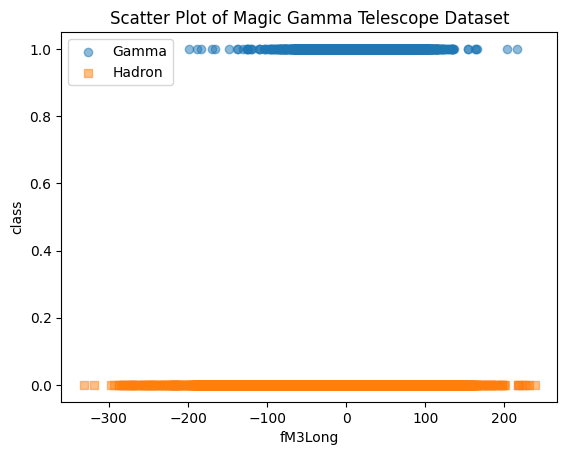

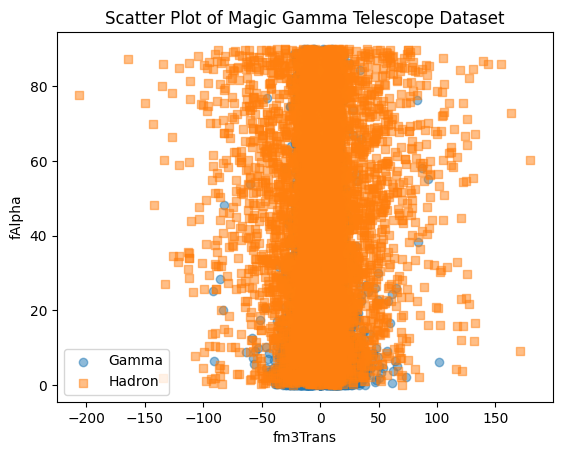

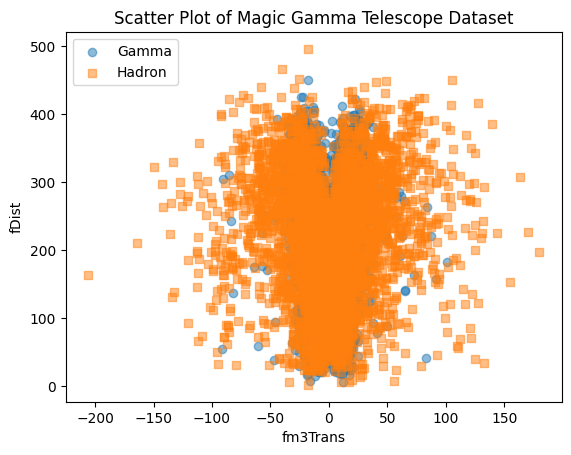

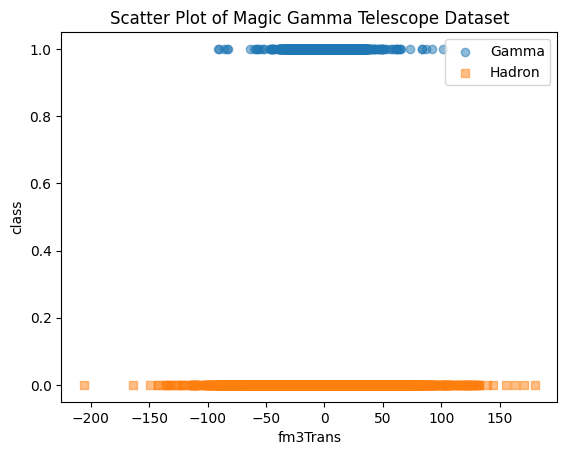

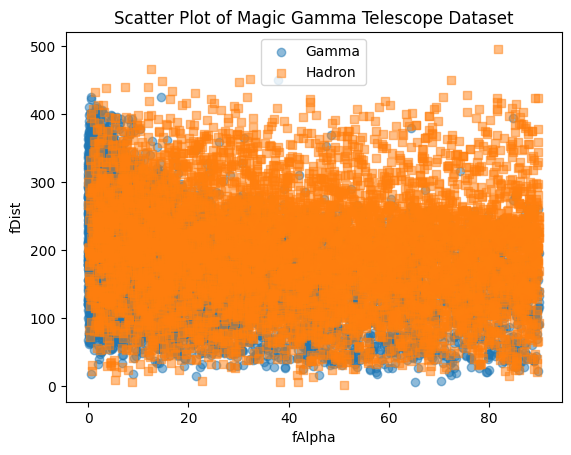

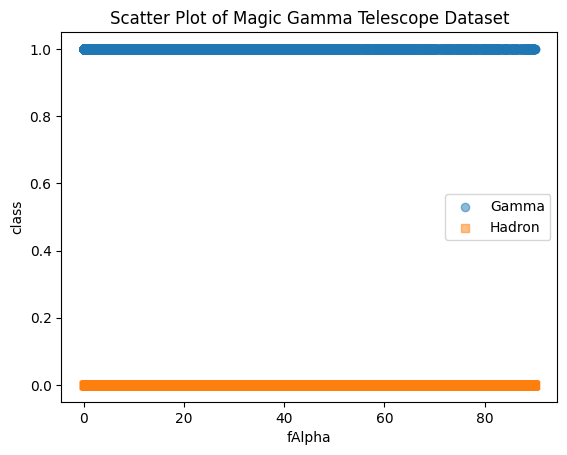

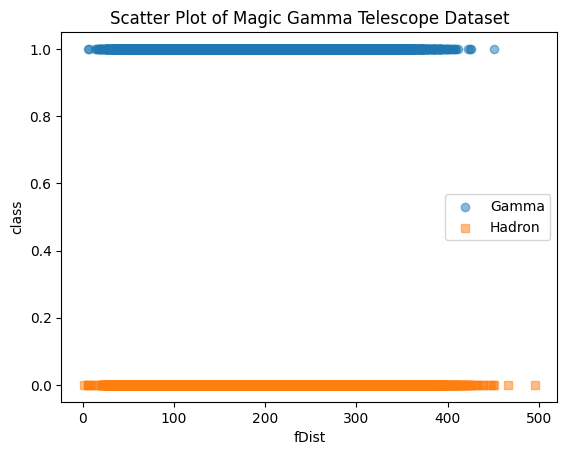

In [203]:
# Plotting Scatter graph
ll = len(df.columns)
for x in range(ll):
    for y in range(x+1,ll):
        scatterPlot(df.columns[x],df.columns[y],df)

#### Defining a FNN Model with 2 hidden layers with 128 and 64 neurons respectively

In [206]:
def train_model(X_train,y_train,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(128,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
  return nn_model,history

dropout prob 0, lr 0.1, batch size 32


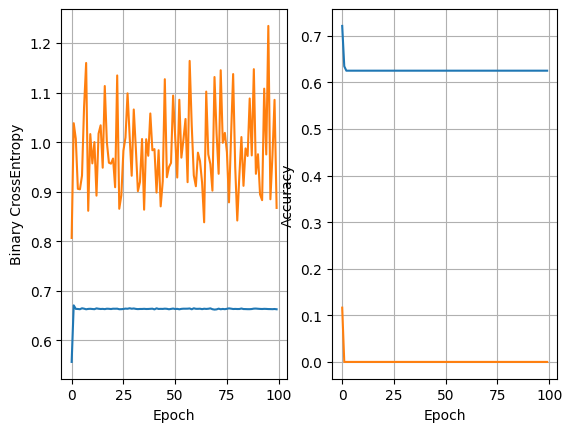

119/119 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6622
dropout prob 0, lr 0.1, batch size 64


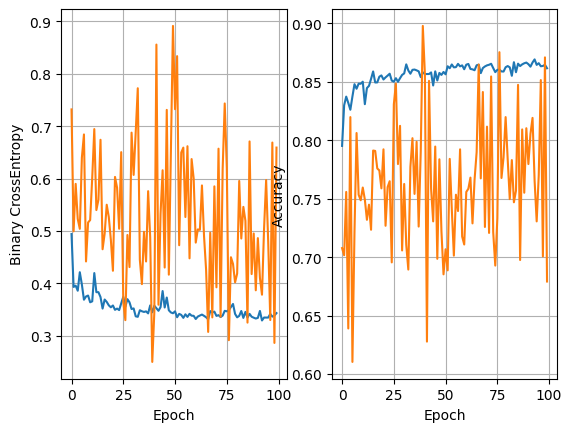

119/119 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8633
dropout prob 0, lr 0.1, batch size 128


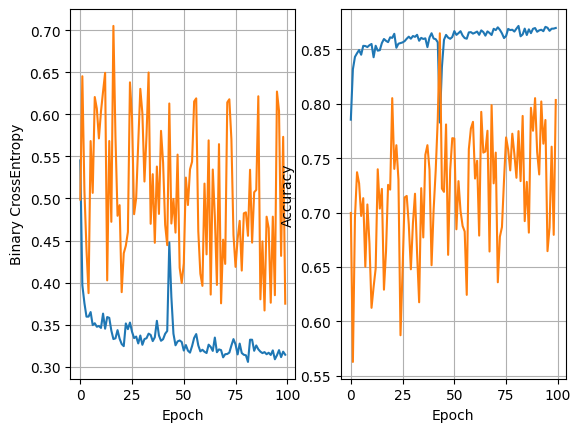

119/119 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8693
dropout prob 0, lr 0.005, batch size 32


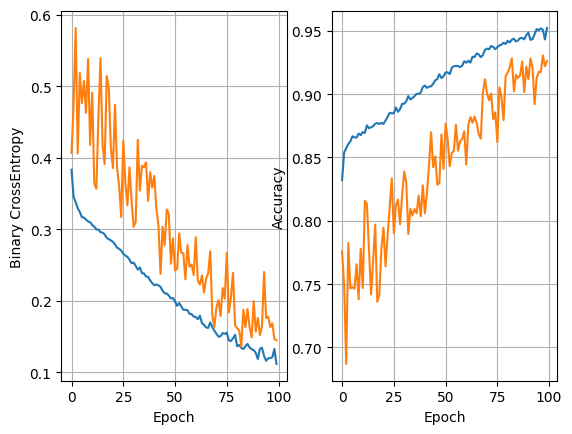

119/119 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.8599
dropout prob 0, lr 0.005, batch size 64


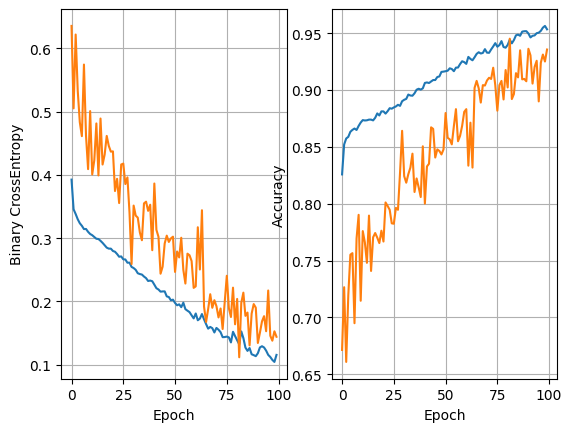

119/119 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.8433
dropout prob 0, lr 0.005, batch size 128


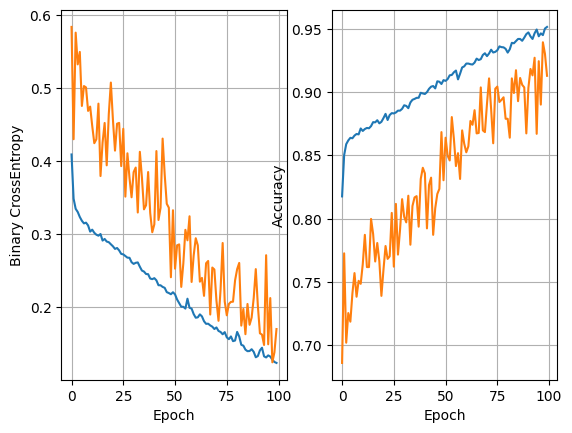

119/119 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.8654
dropout prob 0, lr 0.001, batch size 32


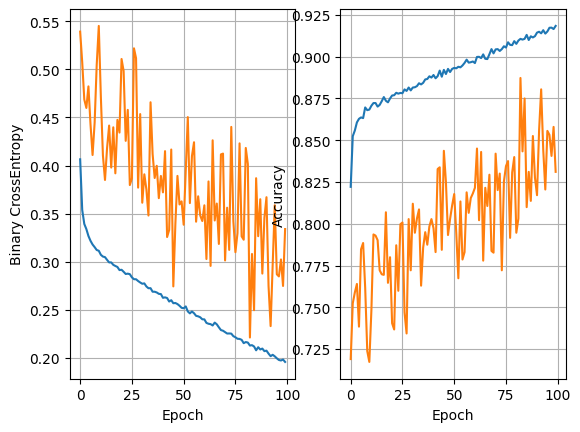

119/119 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8762
dropout prob 0, lr 0.001, batch size 64


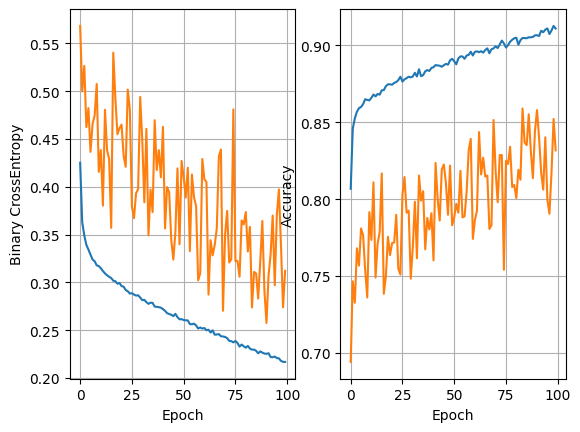

119/119 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8751
dropout prob 0, lr 0.001, batch size 128


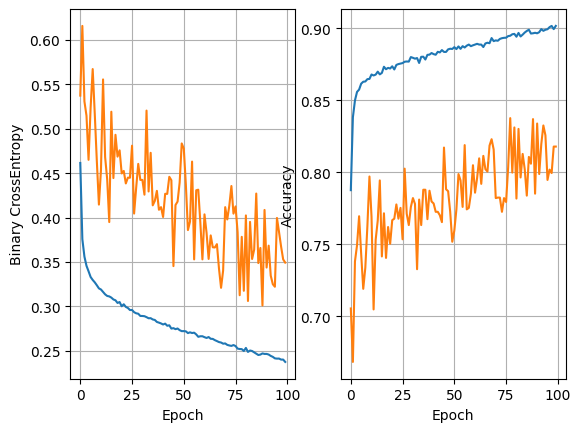

119/119 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8859
dropout prob 0.2, lr 0.1, batch size 32


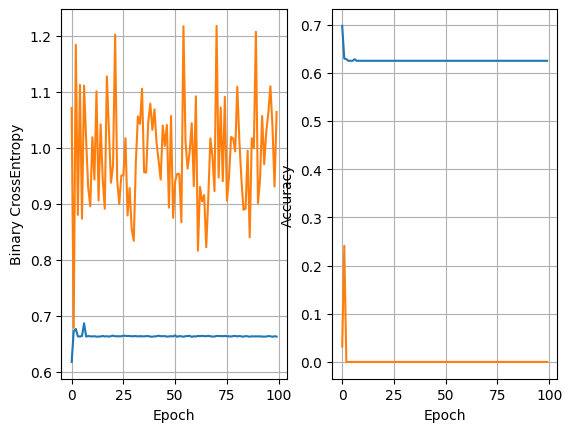

119/119 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.6622
dropout prob 0.2, lr 0.1, batch size 64


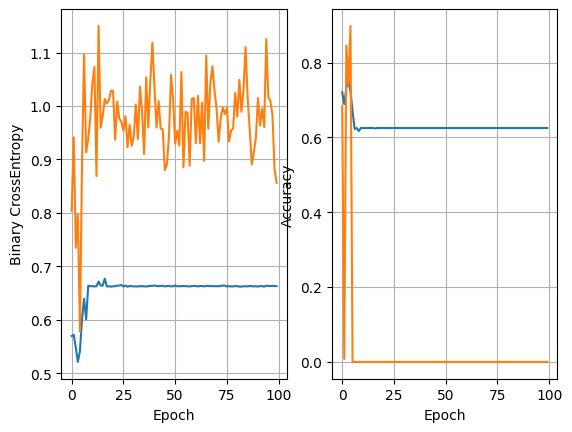

119/119 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6622
dropout prob 0.2, lr 0.1, batch size 128


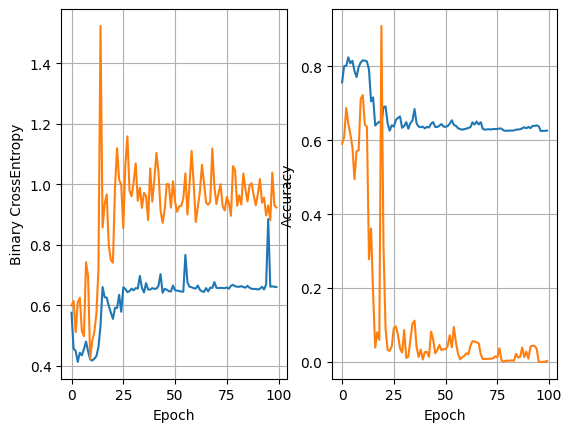

119/119 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6635
dropout prob 0.2, lr 0.005, batch size 32


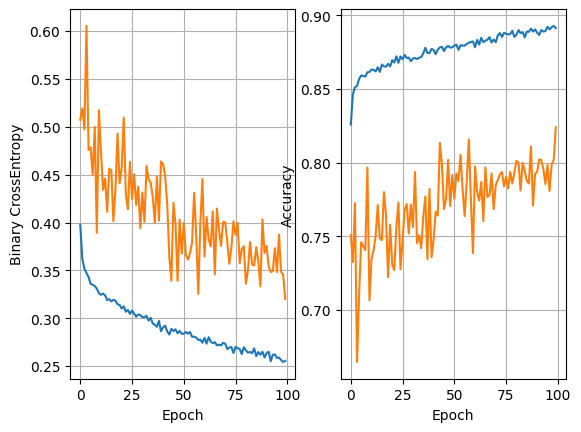

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8875
dropout prob 0.2, lr 0.005, batch size 64


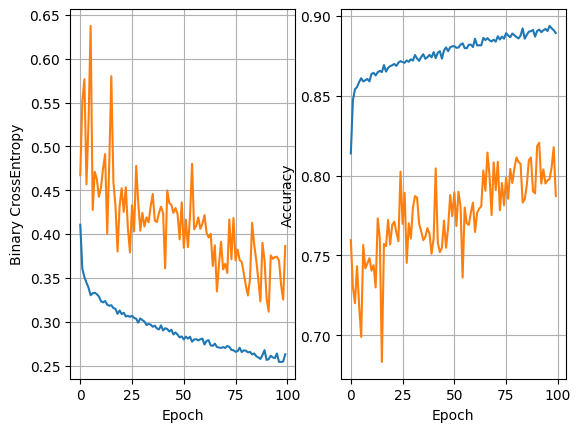

119/119 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8838
dropout prob 0.2, lr 0.005, batch size 128


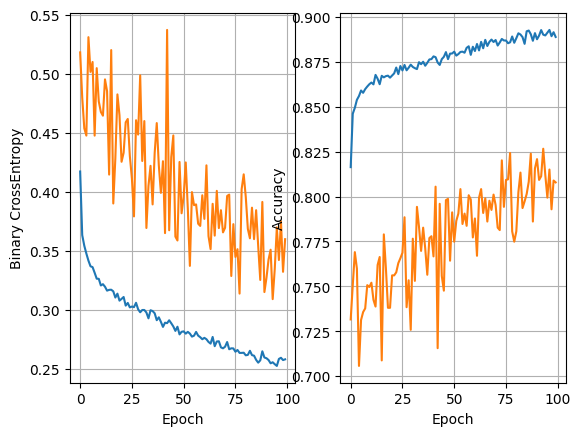

119/119 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8849
dropout prob 0.2, lr 0.001, batch size 32


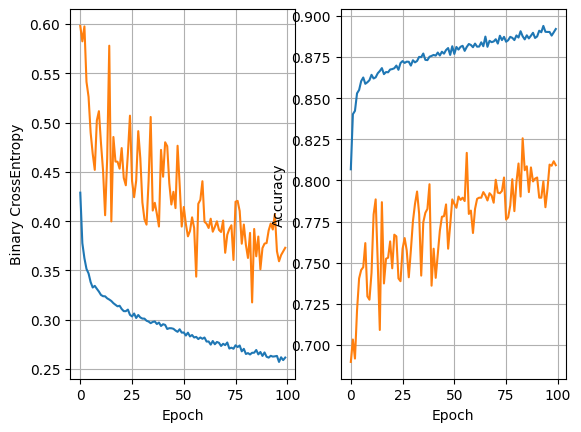

119/119 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8927
dropout prob 0.2, lr 0.001, batch size 64


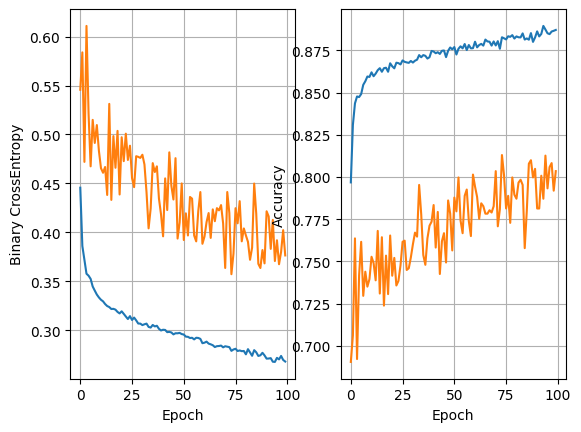

119/119 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8891
dropout prob 0.2, lr 0.001, batch size 128


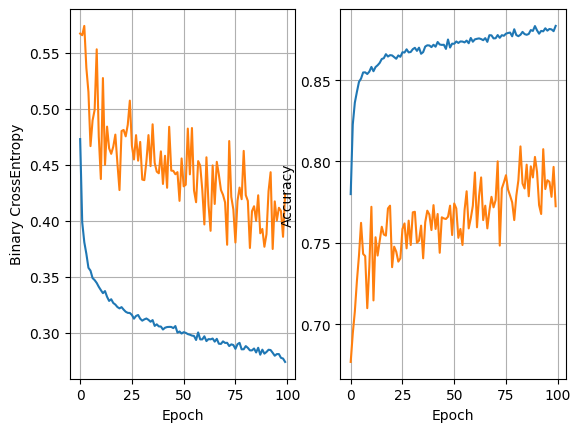

119/119 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8880
dropout prob 0.3, lr 0.1, batch size 32


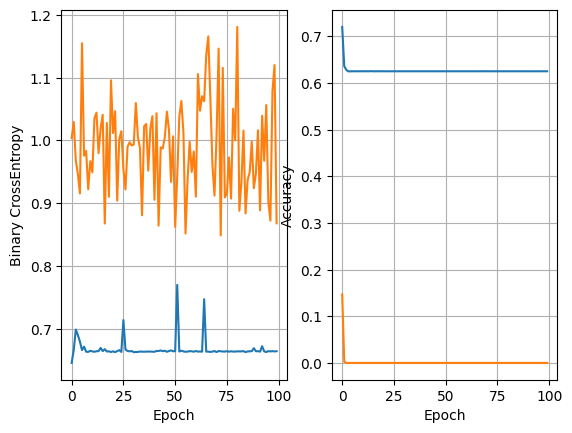

119/119 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6622
dropout prob 0.3, lr 0.1, batch size 64


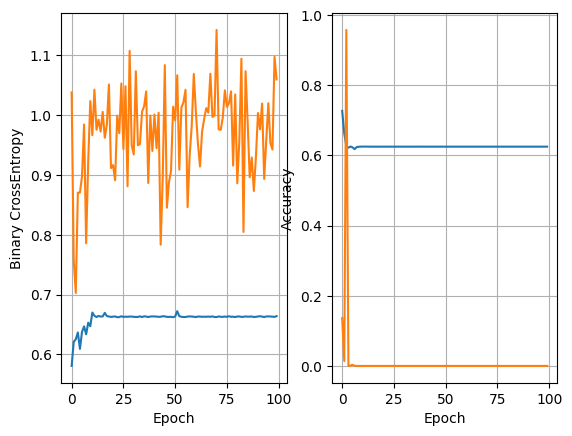

119/119 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.6622
dropout prob 0.3, lr 0.1, batch size 128


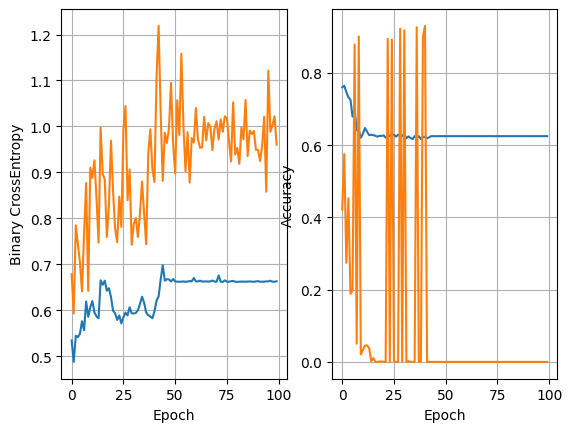

119/119 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6622
dropout prob 0.3, lr 0.005, batch size 32


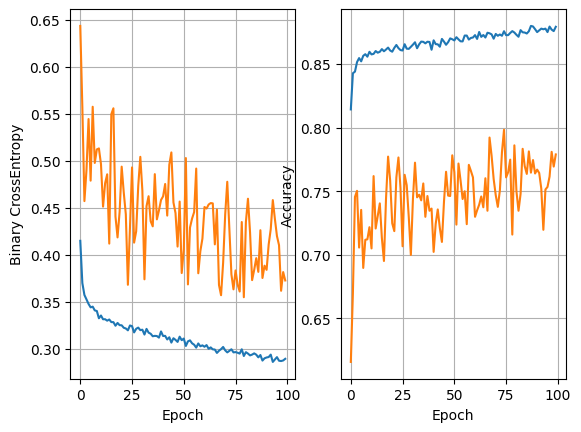

119/119 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8814
dropout prob 0.3, lr 0.005, batch size 64


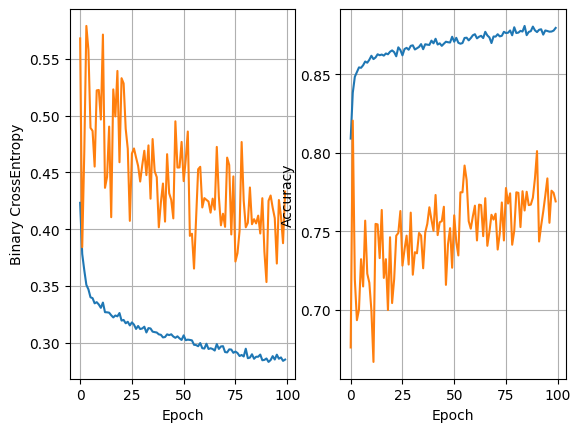

119/119 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8851
dropout prob 0.3, lr 0.005, batch size 128


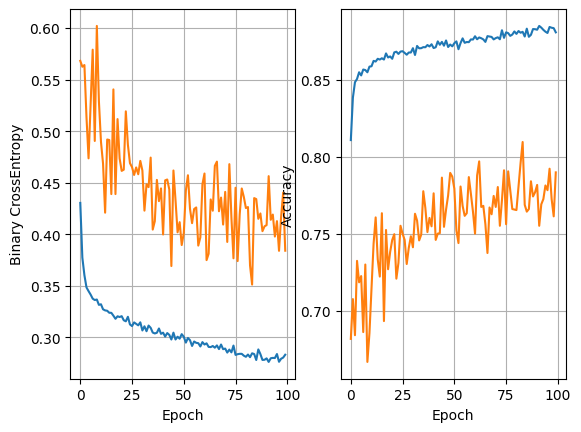

119/119 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8864
dropout prob 0.3, lr 0.001, batch size 32


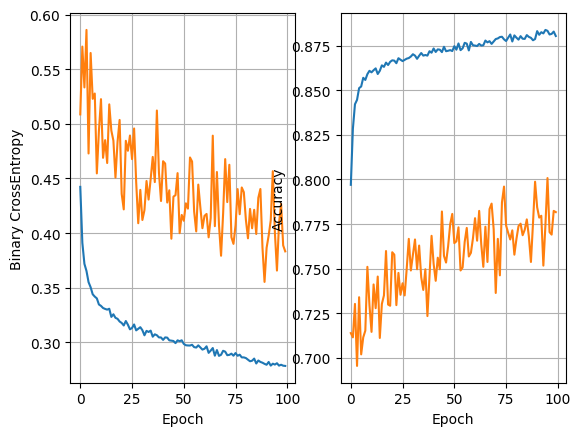

119/119 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8888
dropout prob 0.3, lr 0.001, batch size 64


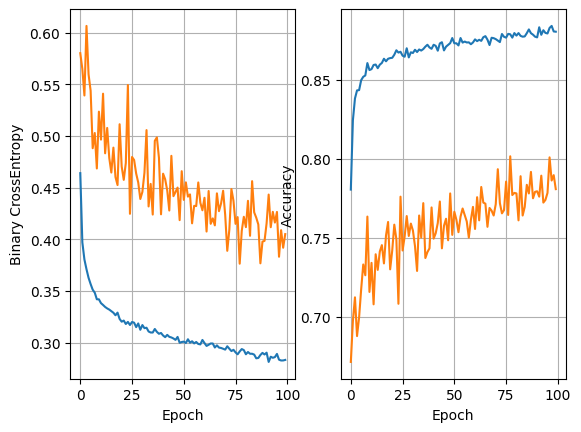

119/119 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.8854
dropout prob 0.3, lr 0.001, batch size 128


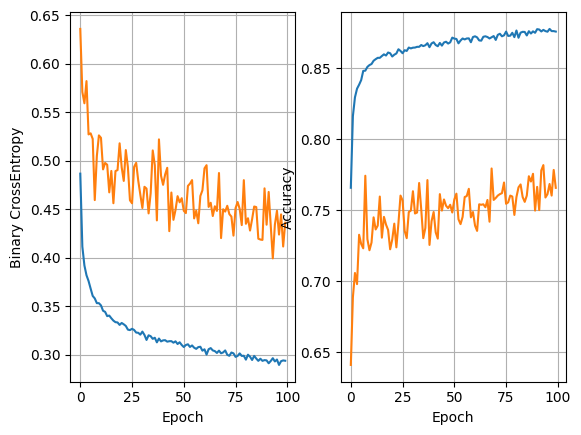

119/119 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8835
dropout prob 0.5, lr 0.1, batch size 32


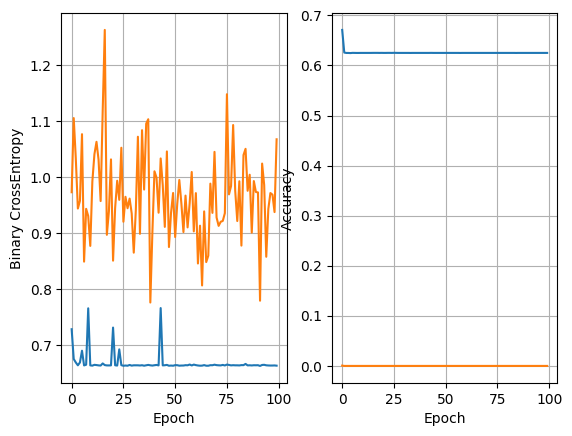

119/119 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6622
dropout prob 0.5, lr 0.1, batch size 64


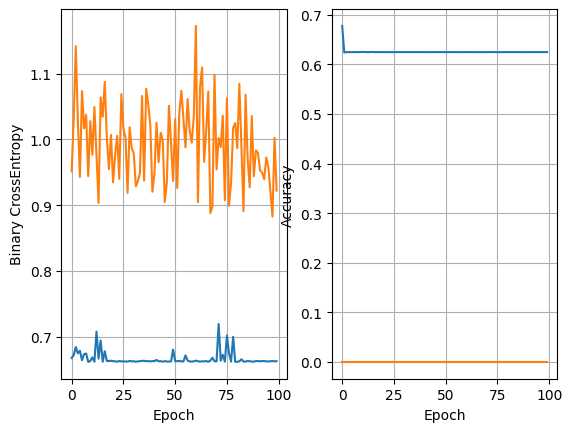

119/119 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6622
dropout prob 0.5, lr 0.1, batch size 128


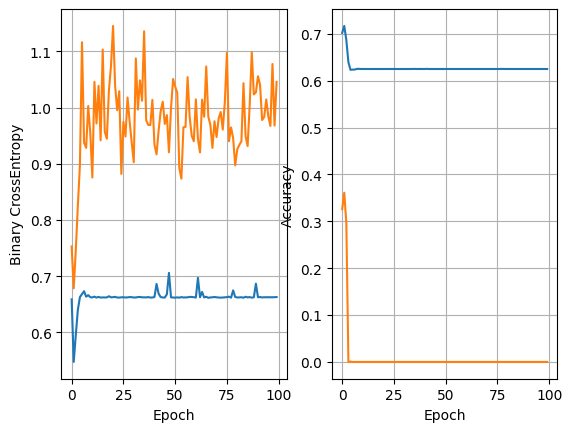

119/119 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6622
dropout prob 0.5, lr 0.005, batch size 32


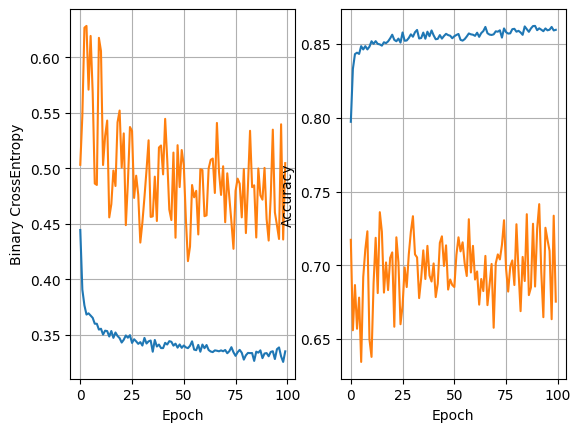

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8675
dropout prob 0.5, lr 0.005, batch size 64


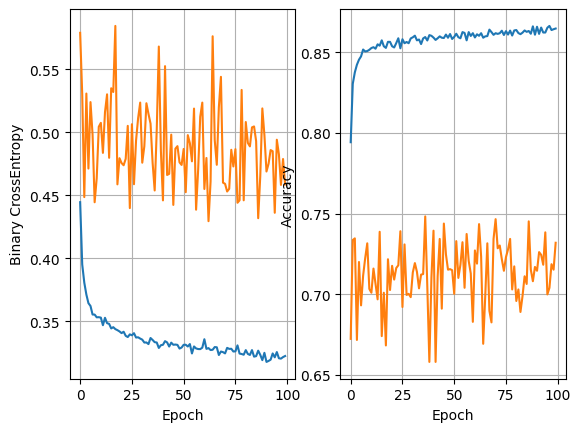

119/119 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8814
dropout prob 0.5, lr 0.005, batch size 128


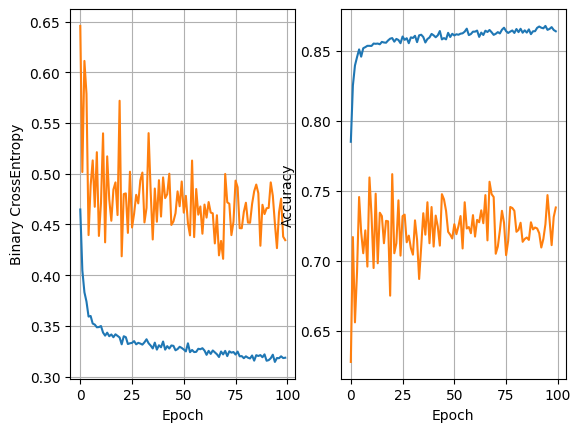

119/119 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8830
dropout prob 0.5, lr 0.001, batch size 32


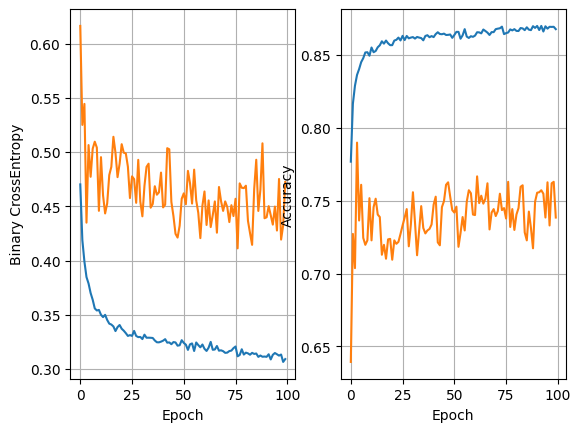

119/119 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.8833
dropout prob 0.5, lr 0.001, batch size 64


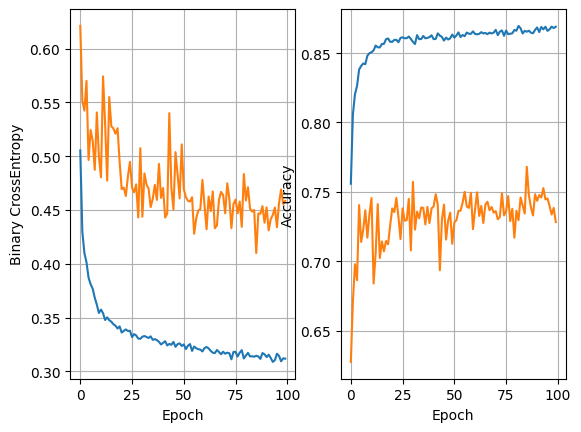

119/119 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8830
dropout prob 0.5, lr 0.001, batch size 128


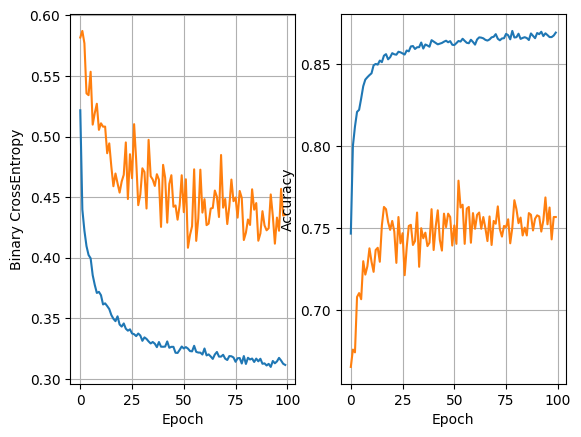

119/119 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.8867

Neural Network Training Successfully Finished !!


In [207]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for dropout_prob in [0,0.2,0.3,0.5]:
  for lr in [0.1,0.005,0.001]:
    for batch_size in [32,64,128]:
      print(f"dropout prob {dropout_prob}, lr {lr}, batch size {batch_size}")
      model,history = train_model(X_train,y_train,dropout_prob,lr,batch_size,epochs)
      plot_history(history)
      val_loss = model.evaluate(X_valid,y_valid)
      # print(val_loss)
      if val_loss[0]<least_val_loss:
        least_val_loss = val_loss[0]
        least_loss_model = model
  
print("\nNeural Network Training Successfully Finished !!")

In [212]:
NeuralModel = least_loss_model

In [215]:
# Making Predictions on Training and Testing Dataset
y_train_pred = NeuralModel.predict(X_train)
y_train_pred = (y_train_pred>0.5).astype(int).reshape(-1,)

y_test_pred = NeuralModel.predict(X_test)
y_test_pred = (y_test_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [216]:
#Calculating Training and Testing Accuracy
neural_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
neural_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {neural_train_accuracy}")
print(f"Testing Accuracy: {neural_test_accuracy}")

Training Accuracy: 0.8701457964300313
Testing Accuracy: 0.8840694006309149


In [219]:
add_accuracy(neural_train_accuracy,neural_test_accuracy,"NeuralModel")

Successfully added Accuracy of NeuralModel in the Accuracy Dictionary


In [217]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1330
           1       0.88      0.95      0.91      2474

    accuracy                           0.88      3804
   macro avg       0.89      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



Confusion Matrix:
[[1009  321]
 [ 120 2354]]


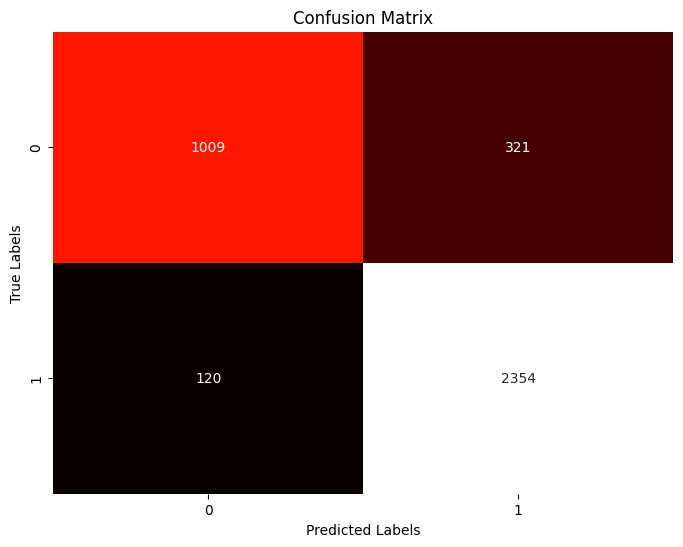

In [218]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

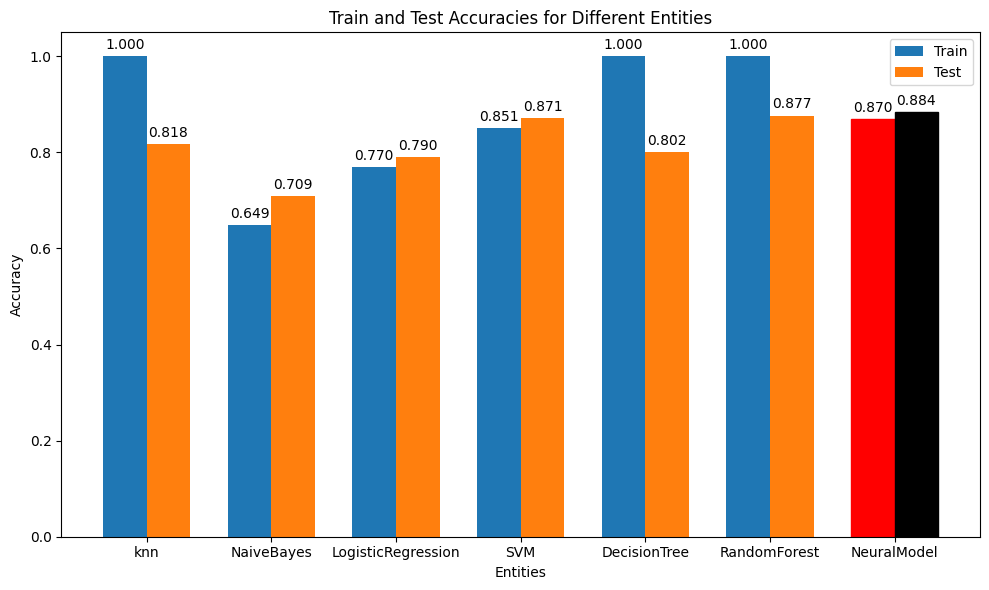

In [222]:
# Extract entities, training, and testing values
entities = list(accuracy_dic.keys())
train_values = [value['Train'] for value in accuracy_dic.values()]
test_values = [value['Test'] for value in accuracy_dic.values()]

# Set up positions for the bar groups
bar_width = 0.35
index = np.arange(len(entities))

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, train_values, bar_width, label='Train')
bar2 = ax.bar(index + bar_width, test_values, bar_width, label='Test')

# Customize the plot
ax.set_xlabel('Entities')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracies for Different Entities')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(entities)
ax.legend()

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.3f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

bar1[-1].set_color("red")
bar2[-1].set_color("black")
# Show the plot
plt.tight_layout()
plt.show()

Here We got That Testing Accuracy of Neural Network Model is highest ie, **88.4%** among all the Models so we can consider this model as the Best Model for the "**MAGIC GAMMA TELESCOPE DATASET**"

### SAVING THE NEURAL NETWORK MODEL as .h5 Model

In [223]:
# importing save_model from tensorflow
from tensorflow.keras.models import save_model
save_model(NeuralModel, 'neuralModel.h5')

C:\Users\addym\AppData\Local\Temp\ipykernel_23396\4091744497.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(NeuralModel, 'neuralModel.h5')


# END OF THE PROJECT THANK YOU